In [1]:
!git clone https://github.com/belfassikhaoula123/Projet_RGD.git

Cloning into 'Projet_RGD'...
remote: Enumerating objects: 5589, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 5589 (delta 1), reused 0 (delta 0), pack-reused 5583 (from 2)
Receiving objects: 100% (5589/5589), 24.91 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Updating files: 100% (7867/7867), done.
Error downloading object: Data/data.csv (f8d968c): Smudge error: Error downloading Data/data.csv (f8d968c61829ec0f764f25311bdf24ce938e8c64f5ea2c29c6265baacbd282f2): batch response: This repository exceeded its LFS budget. The account responsible for the budget should increase it to restore access.

Errors logged to /content/Projet_RGD/.git/lfs/logs/20251214T133455.666399139.log
Use `git lfs logs last` to view the log.
error: external filter 'git-lfs filter-process' failed
fatal: Data/data.csv: smudge filter lfs failed
You can inspect what was checked out with 'git status'
and retry with 'git restore --source=H

In [3]:
import pandas as pd
import glob
import os
import random
import numpy as np
import cv2


In [ ]:
df=pd.read_csv("/content/Projet_RGD/Data/data.csv")
df.head()

Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   
2  TCGA_CS_4943            1.0                 5.0             2        1.0   
3  TCGA_CS_4944            NaN                 5.0             2        1.0   
4  TCGA_CS_5393            4.0                 5.0             2        1.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   
2          2.0              2.0           1                1.0   
3          2.0              1.0           1                1.0   
4          2.0              3.0           1                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_location  \
0                        2.0                1.0         3.0             2.0   
1                        2.0                1.0         3.0             2.0   
2                        2.0                1.0         1.0             2.0   
3                        1.0                1.0         3.0             6.0   
4                        2.0                1.0         1.0             6.0   

   gender  age_at_initial_pathologic  race  ethnicity  death01  
0     2.0                       67.0   3.0        2.0      1.0  
1     1.0                       44.0   2.0        NaN      1.0  
2     2.0                       37.0   3.0        NaN      0.0  
3     2.0                       50.0   3.0        NaN      0.0  
4     2.0                       39.0   3.0        NaN      0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Patient                    110 non-null    object 
 1   RNASeqCluster              92 non-null     float64
 2   MethylationCluster         109 non-null    float64
 3   miRNACluster               110 non-null    int64  
 4   CNCluster                  108 non-null    float64
 5   RPPACluster                98 non-null     float64
 6   OncosignCluster            105 non-null    float64
 7   COCCluster                 110 non-null    int64  
 8   histological_type          109 non-null    float64
 9   neoplasm_histologic_grade  109 non-null    float64
 10  tumor_tissue_site          109 non-null    float64
 11  laterality                 109 non-null    float64
 12  tumor_location             109 non-null    float64
 13  gender                     109 non-null    float64

In [4]:
data_map = []

for sub_dir_path in glob.glob("/content/Projet_RGD/Data/kaggle_3m/*"):
    try:
        dir_name = os.path.basename(sub_dir_path)
        for filename in os.listdir(sub_dir_path):
            image_path = os.path.join(sub_dir_path, filename)
            data_map.append([dir_name, image_path])
    except Exception as e:
        print(e)

In [5]:
df1 = pd.DataFrame(data_map, columns=["patient_id", "image_path"])
df1.head()

patient_id                                         image_path
0  TCGA_DU_A5TR_19970726  /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...
1  TCGA_DU_A5TR_19970726  /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...
2  TCGA_DU_A5TR_19970726  /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...
3  TCGA_DU_A5TR_19970726  /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...
4  TCGA_DU_A5TR_19970726  /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...

In [6]:
df_imgs = df1[~df1['image_path'].str.contains("mask")]
df_masks = df1[df1['image_path'].str.contains("mask")]

# extraction dfu numéro de l'image
BASE_LEN = 79 # index ou commence le numéro
END_IMG_LEN = 4 # nombre de chaines de caractères à éliminer de la fin du chemin de l'image
END_MASK_LEN = 9 # nombre de chaines de caractères à éliminer de la fin du chemin du mask

# trier les images et masks selon leur numéros
imgs = sorted(df_imgs["image_path"].values, key=lambda x : int(x[BASE_LEN:-END_IMG_LEN]))
masks = sorted(df_masks["image_path"].values, key=lambda x : int(x[BASE_LEN:-END_MASK_LEN]))

#vérification
idx = random.randint(0, len(imgs)-1)
print("Path to the Image:", imgs[idx], "\nPath to the Mask:", masks[idx])

Path to the Image: /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_26.tif 
Path to the Mask: /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5TR_19970726/TCGA_DU_A5TR_19970726_26_mask.tif


# Creation de la data finale

In [7]:
df_final = pd.DataFrame({
    "patient_id": df_imgs.patient_id.values,
    "image_path": imgs,
    "mask_path": masks
})

def pos_neg_diagnosis(mask_path):
    value = np.max(cv2.imread(mask_path))
    if value > 0 :
        return 1
    else:
        return 0

In [8]:
df_final['mask'] = df_final['mask_path'].apply(lambda x: pos_neg_diagnosis(x))

In [9]:
df_final

patient_id  \
0     TCGA_DU_A5TR_19970726   
1     TCGA_DU_A5TR_19970726   
2     TCGA_DU_A5TR_19970726   
3     TCGA_DU_A5TR_19970726   
4     TCGA_DU_A5TR_19970726   
...                     ...   
3924  TCGA_FG_6690_20020226   
3925  TCGA_FG_6690_20020226   
3926  TCGA_FG_6690_20020226   
3927  TCGA_FG_6690_20020226   
3928  TCGA_FG_6690_20020226   

                                             image_path  \
0     /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...   
1     /content/Projet_RGD/Data/kaggle_3m/TCGA_FG_764...   
2     /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_585...   
3     /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_494...   
4     /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...   
...                                                 ...   
3924  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...   
3925  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...   
3926  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...   
3927  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...   
3928  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...   

                                              mask_path  mask  
0     /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_A5T...     0  
1     /content/Projet_RGD/Data/kaggle_3m/TCGA_FG_764...     0  
2     /content/Projet_RGD/Data/kaggle_3m/TCGA_DU_585...     0  
3     /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_494...     0  
4     /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...     0  
...                                                 ...   ...  
3924  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...     0  
3925  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...     0  
3926  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...     0  
3927  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...     0  
3928  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_A61...     0  

[3929 rows x 4 columns]

In [ ]:
df_final["mask"].value_counts()

mask
0    2556
1    1373
Name: count, dtype: int64

## Pondération des classes

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(df_final['mask']),
    y=df_final['mask']
)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: np.float64(0.7685837245696401), 1: np.float64(1.4308084486525856)}

# Data Visualisation

In [ ]:
import plotly.graph_objects as go

fig = go.Figure([go.Bar(x=df_final['mask'].value_counts().index,
                        y=df_final['mask'].value_counts(),
                        width=[.4, .4]
                       )
                ])
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=4, opacity=0.4
                 )
fig.update_layout(title_text="Graphique du nombre des masks",
                  width=700,
                  height=550,
                  yaxis=dict(
                             title_text="Count",
                             tickmode="array",
                             titlefont=dict(size=20)
                           )
                 )
fig.update_yaxes(automargin=True)
fig.show()


In [ ]:
import matplotlib.pyplot as plt


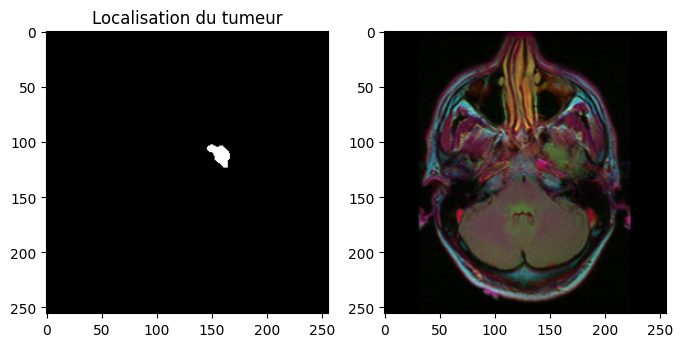

In [ ]:
for i in range(len(df_final)):
    if cv2.imread(df_final.mask_path[i]).max() > 0:
        break

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(cv2.imread(df_final.mask_path[i]));
plt.title('Localisation du tumeur')

plt.subplot(1,2,2)
plt.imshow(cv2.imread(df_final.image_path[i]));

In [ ]:
cv2.imread(df_final.mask_path[i]).max(), cv2.imread(df_final.mask_path[i]).min()

(np.uint8(255), np.uint8(0))

Les valeurs min=0 et max=255 indiquent que le masque est binaire et contient bien une région annotée. La présence de la valeur 255 confirme l’existence d’une zone tumorale sur cette image.

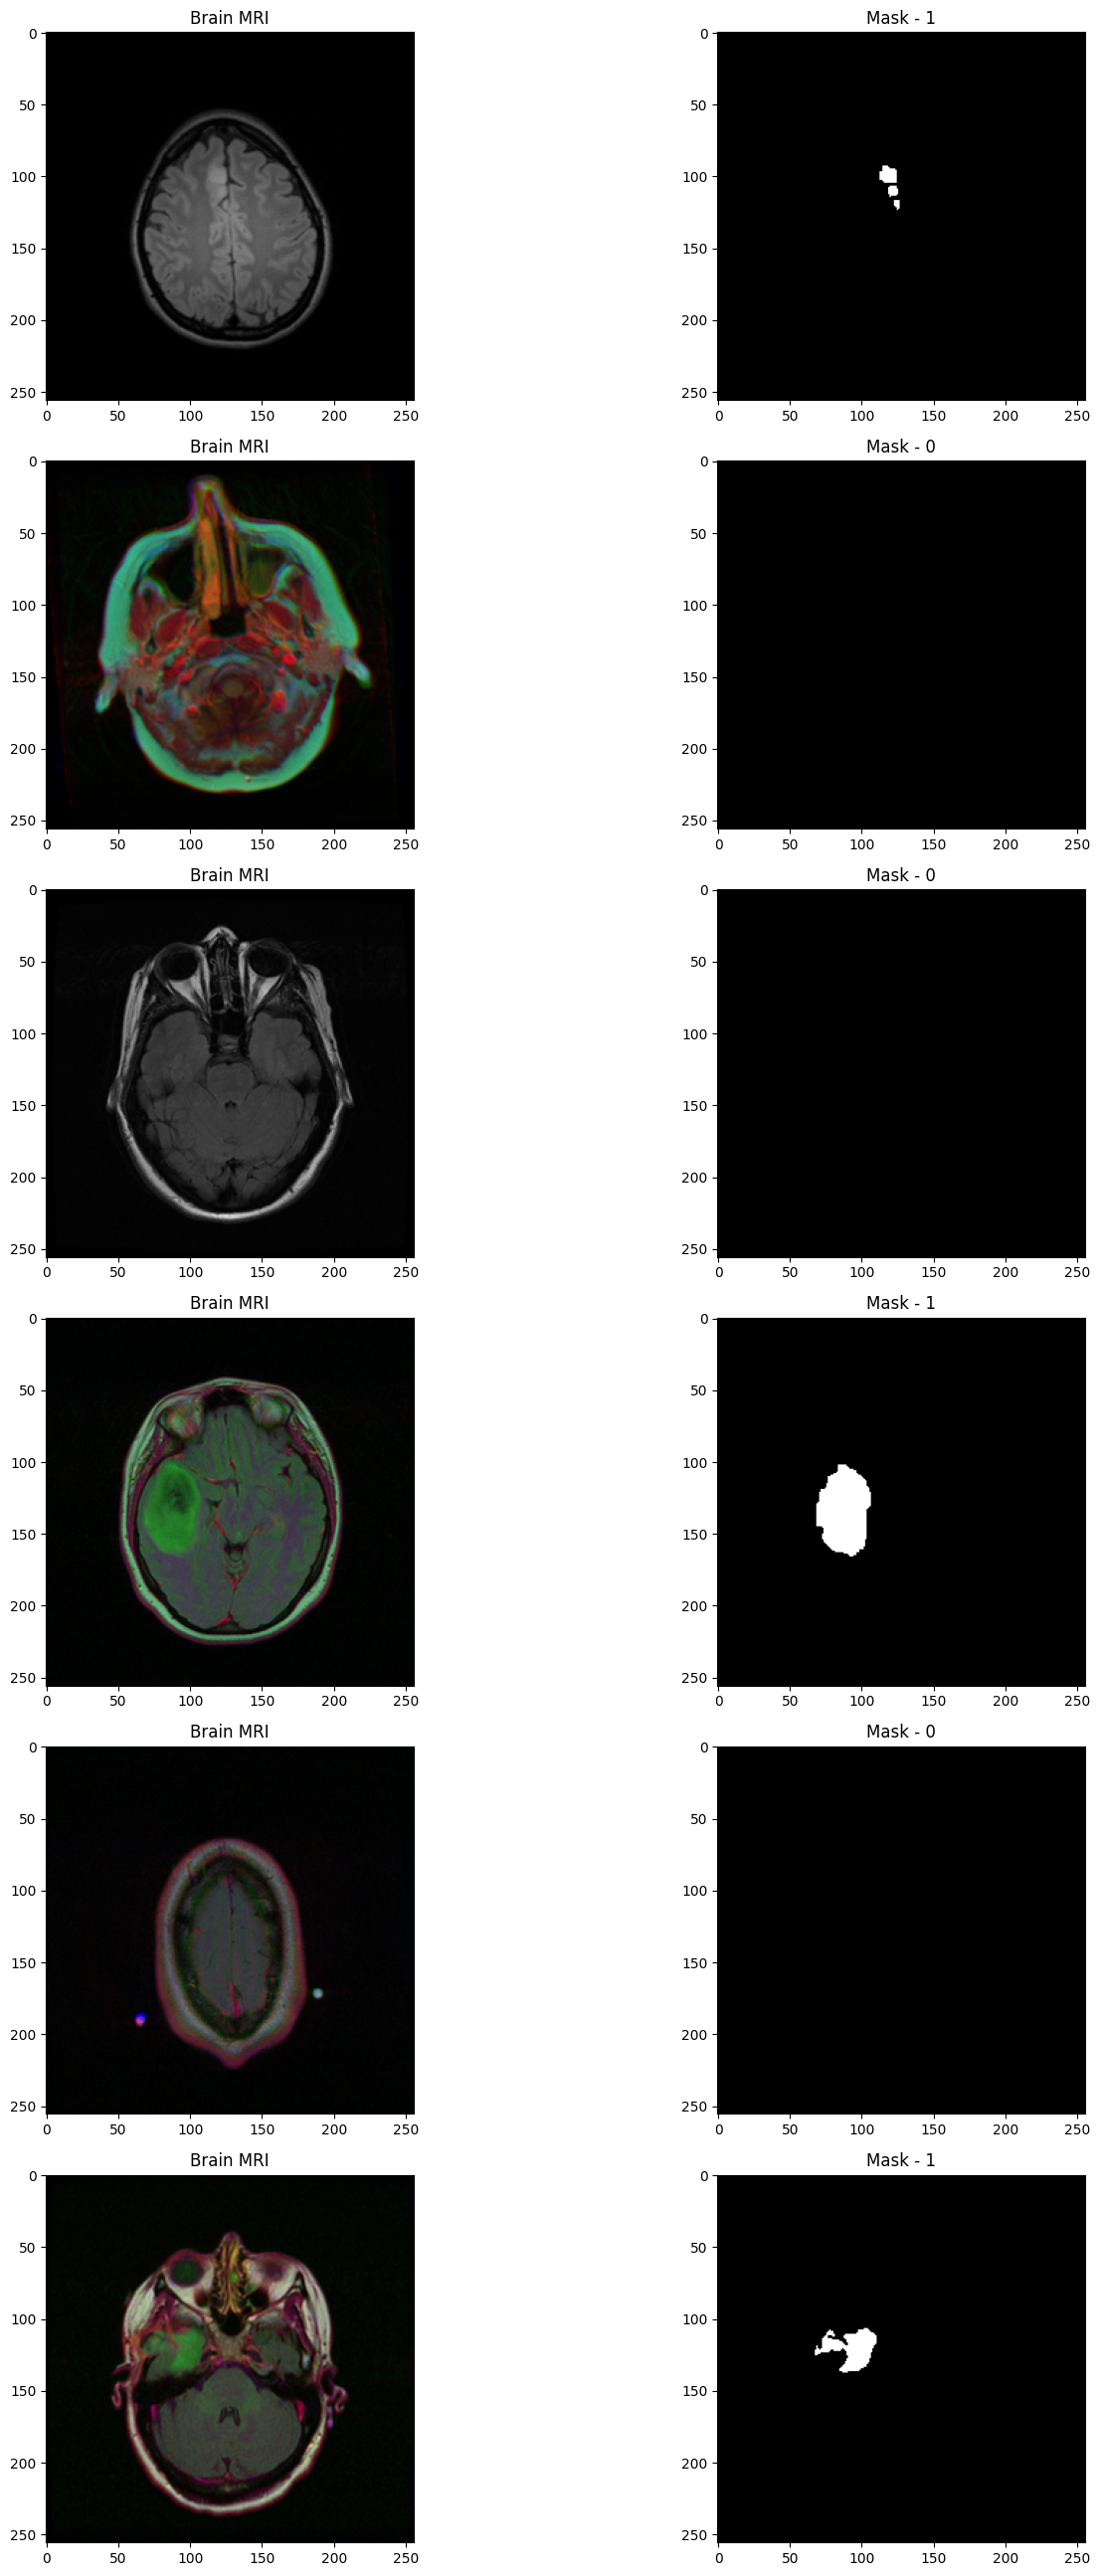

In [ ]:
# Visualisations de base : afficher séparément les images (IRM et masques) du dataset
fig, axs = plt.subplots(6,2, figsize=(16,26))
count = 0
for x in range(6):
  i = random.randint(0, len(df_final))
  axs[count][0].title.set_text("Brain MRI")
  axs[count][0].imshow(cv2.imread(df_final.image_path[i]))
  axs[count][1].title.set_text("Mask - " + str(df_final['mask'][i]))
  axs[count][1].imshow(cv2.imread(df_final.mask_path[i]))
  count += 1

fig.tight_layout()

**Affichage des images cérébrales (IRM) et superposition des masques de tumeur**

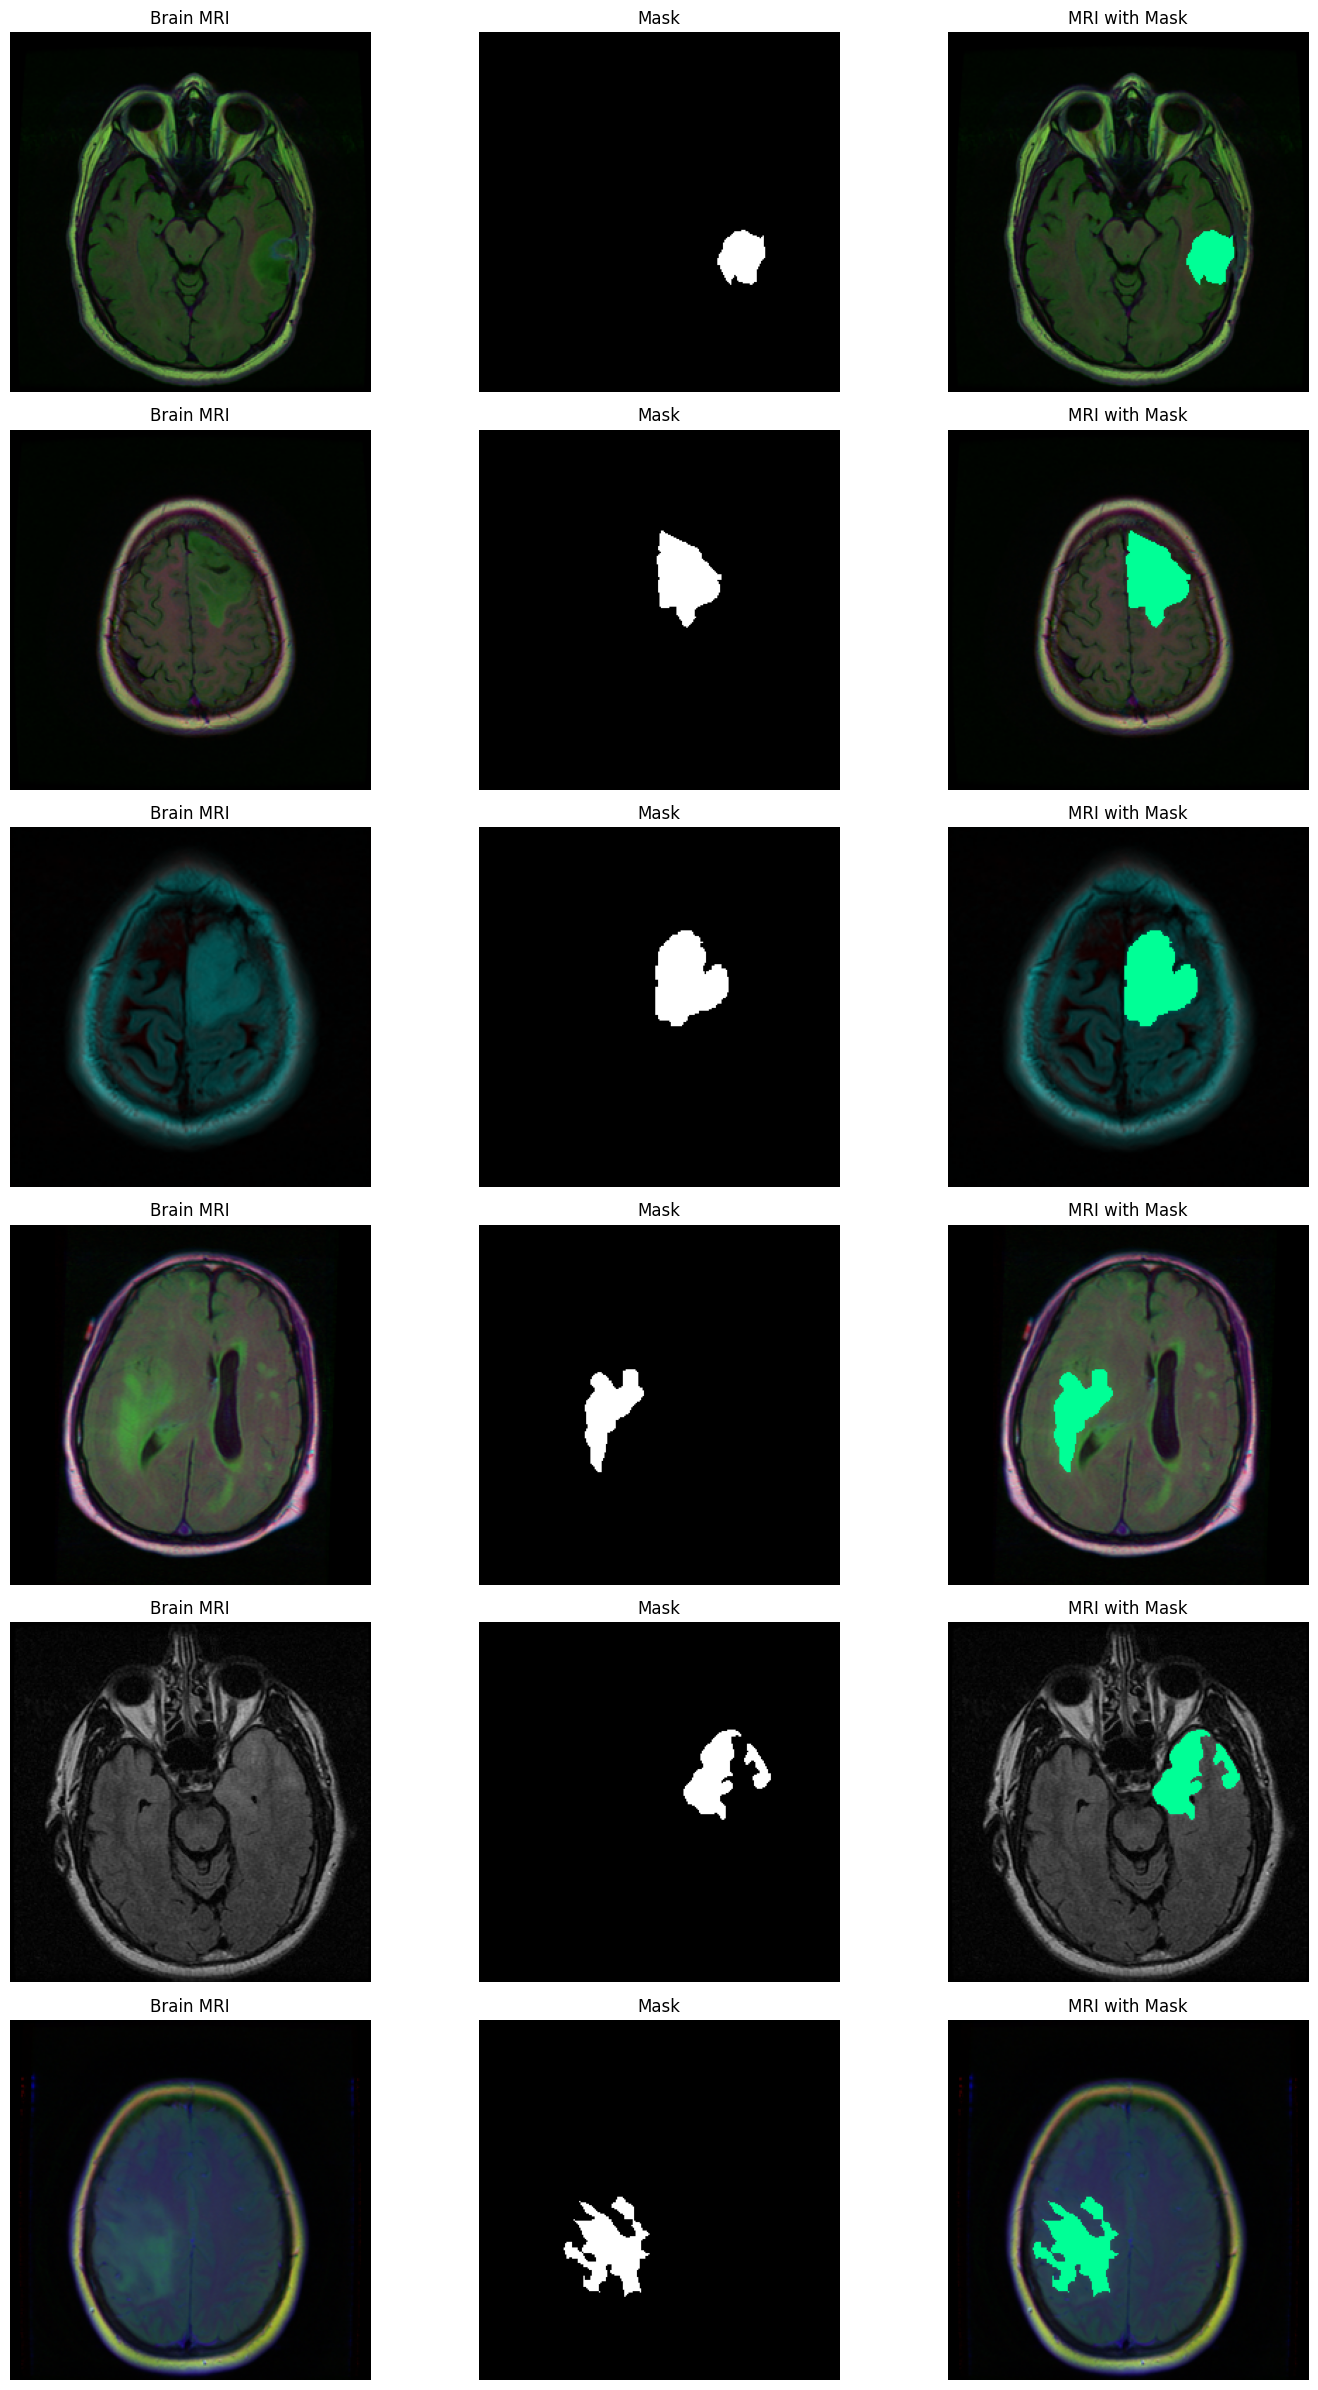

In [ ]:
# On prend uniquement les images avec tumeur (mask==1)
df_pos = df_final[df_final["mask"] == 1].reset_index(drop=True)

n = 6  # nombre d'exemples à afficher
idxs = np.random.choice(len(df_pos), size=n, replace=False)

fig, axs = plt.subplots(n, 3, figsize=(15, 4*n))

for row, k in enumerate(idxs):
    img = cv2.imread(df_pos.loc[k, "image_path"])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(df_pos.loc[k, "mask_path"], cv2.IMREAD_GRAYSCALE)
    mask_bin = (mask > 0)

    overlay = img_rgb.copy()
    overlay[mask_bin] = (0, 255, 150)

    axs[row, 0].imshow(img_rgb)
    axs[row, 0].set_title("Brain MRI")
    axs[row, 0].axis("off")

    axs[row, 1].imshow(mask, cmap="gray")
    axs[row, 1].set_title("Mask")
    axs[row, 1].axis("off")

    axs[row, 2].imshow(overlay)
    axs[row, 2].set_title("MRI with Mask")
    axs[row, 2].axis("off")

plt.tight_layout()
plt.show()


# Split des données

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import *

In [ ]:
df_final = df_final.drop(columns=['patient_id'])
df_final['mask'] = df_final['mask'].apply(lambda x: str(x))

In [ ]:
df_train, df_test = train_test_split(df_final, test_size = 0.1, random_state = 42)
df_train, df_val = train_test_split(df_train, test_size = 0.1, random_state = 42)
print('train data shape: ', df_train.values.shape)
print('val data shape:   ', df_val.values.shape)
print('test data shape:  ', df_test.values.shape)

train data shape:  (3182, 3)
val data shape:    (354, 3)
test data shape:   (393, 3)


# Augmentation des données

In [ ]:
# Data augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Pas d'augmentation pour validation et test, juste normalisation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Générateur d'entraînement
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='image_path',
    y_col='mask',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

# Générateur de validation
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='image_path',
    y_col='mask',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

# Générateur de test
test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='image_path',
    y_col='mask',
    target_size=(256,256),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)


Found 3182 validated image filenames belonging to 2 classes.
Found 354 validated image filenames belonging to 2 classes.
Found 393 validated image filenames belonging to 2 classes.


# Modèle CNN pour la classification des tumeurs

**Initialisation du modéle**

In [ ]:
from tensorflow.keras import layers, models
# CNN pour classification binaire d'images 256x256x3 : 3 blocs Conv2D
# + MaxPooling pour extraire des caractéristiques
# + Flatten pour vectoriser
# + Dense(128) pour combiner les features
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,105 (56.61 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

**Entrainement du modèle**

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 494s 2s/step - accuracy: 0.6511 - loss: 0.7087 - val_accuracy: 0.7712 - val_loss: 0.4629
Epoch 2/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 492s 2s/step - accuracy: 0.7399 - loss: 0.5064 - val_accuracy: 0.7825 - val_loss: 0.4425
Epoch 3/30
 98/199 ━━━━━━━━━━━━━━━━━━━━ 4:09 2s/step - accuracy: 0.7648 - loss: 0.4553

**Evaluation des performances du modèle**

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9173 - loss: 0.2002
Test Accuracy: 0.93638676404953
Test Loss: 0.1712571680545807


In [ ]:
y_pred_prob = model.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int)
y_true = test_generator.labels

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [ ]:
y_true = test_generator.labels

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report


print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("AUC:", roc_auc_score(y_true, y_pred_prob))

# Matrice de confusion
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9363867684478372
Precision: 0.9140625
Recall: 0.8931297709923665
F1 Score: 0.9034749034749034
AUC: 0.9789056581784278
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       262
           1       0.91      0.89      0.90       131

    accuracy                           0.94       393
   macro avg       0.93      0.93      0.93       393
weighted avg       0.94      0.94      0.94       393



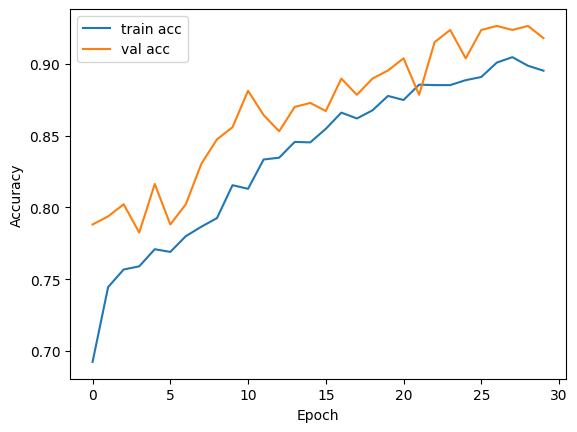

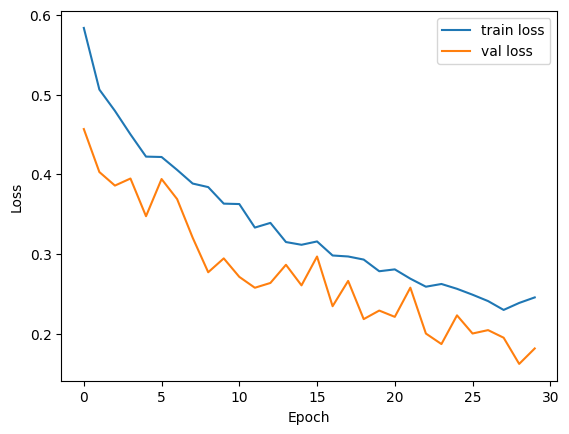

In [ ]:
import matplotlib.pyplot as plt

# Tracé de l'évolution de l'accuracy pendant l'entraînement
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tracé de l'évolution de la loss pendant l'entraînement
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


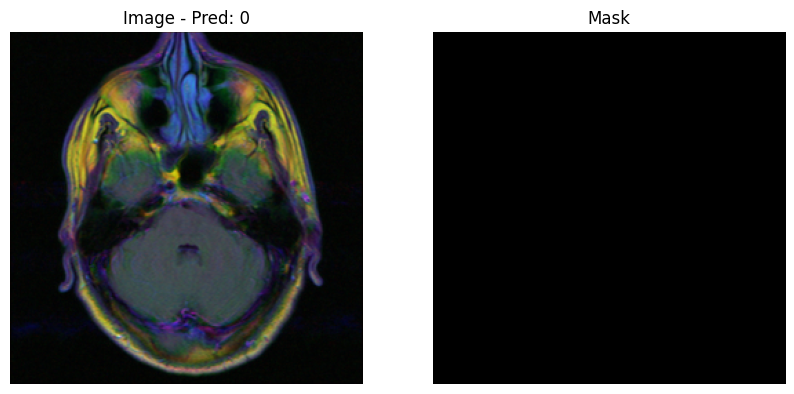

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


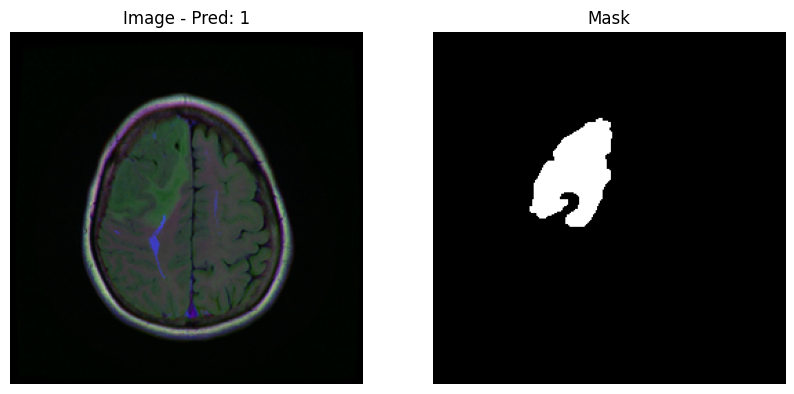

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


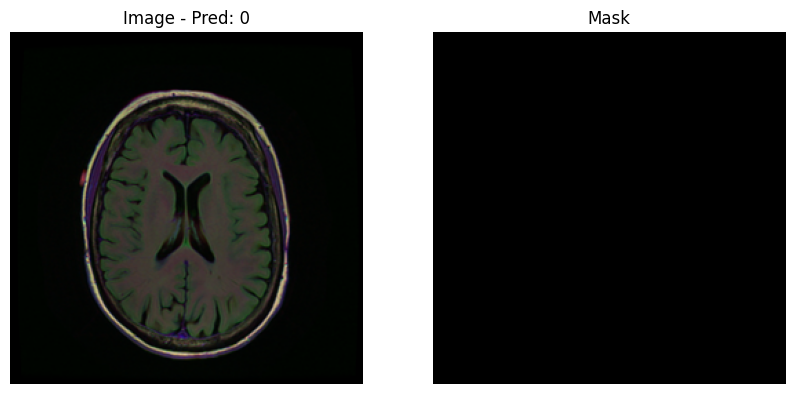

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing import image

# Sélectionner 3 indices aléatoires dans df_val
random_indices = random.sample(range(len(df_val)), 3)

for idx in random_indices:
    # Chemin de l'image et du mask
    img_path = df_val.iloc[idx]['image_path']
    mask_path = df_val.iloc[idx]['mask_path']

    # Charger l'image et le mask
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0

    mask = image.load_img(mask_path, color_mode="grayscale", target_size=(256, 256))
    mask_array = np.array(mask) / 255.0

    # Ajouter dimension batch pour prédiction
    img_array_batch = np.expand_dims(img_array, axis=0)

    # Prédiction du modèle
    pred = model.predict(img_array_batch)
    pred_class = int(pred[0][0] > 0.5)

    # Affichage
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    axs[0].imshow(img)
    axs[0].set_title(f"Image - Pred: {pred_class}")
    axs[0].axis('off')

    axs[1].imshow(mask_array, cmap='gray')
    axs[1].set_title("Mask")
    axs[1].axis('off')

    plt.show()


# Modèle ResNet-50 pour la classification des tumeurs

**Initialisation du modéle**

In [19]:
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50

# Base ResNet50
clf_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256,256,3)))
for layer in clf_model.layers:
    layer.trainable = True

# Tête binaire
head = clf_model.output
head = AveragePooling2D(pool_size=(4,4))(head)
head = Flatten(name='Flatten')(head)
head = Dense(256, activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(256, activation='relu')(head)
head = Dropout(0.3)(head)
head = Dense(1, activation='sigmoid')(head)

model1 = Model(clf_model.input, head)
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 25,751,169 (98.23 MB)

 Trainable params: 25,698,049 (98.03 MB)

 Non-trainable params: 53,120 (207.50 KB)

**Entrainement du modèle**

In [ ]:
h = model1.fit(train_generator,
              steps_per_epoch= train_generator.n // train_generator.batch_size,
              epochs = 30,
              validation_data= val_generator,
              validation_steps= val_generator.n // val_generator.batch_size,
               class_weight=class_weights)

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.6348 - loss: 0.9854

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


198/198 ━━━━━━━━━━━━━━━━━━━━ 151s 489ms/step - accuracy: 0.6350 - loss: 0.9844 - val_accuracy: 0.3920 - val_loss: 5.6797
Epoch 2/30
  1/198 ━━━━━━━━━━━━━━━━━━━━ 37s 190ms/step - accuracy: 0.8125 - loss: 0.4614

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8125 - loss: 0.4614 - val_accuracy: 0.3920 - val_loss: 6.3636
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 142s 607ms/step - accuracy: 0.7429 - loss: 0.5126 - val_accuracy: 0.3920 - val_loss: 10.8285
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8750 - loss: 0.2752 - val_accuracy: 0.3920 - val_loss: 11.1302
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 64s 322ms/step - accuracy: 0.8078 - loss: 0.4099 - val_accuracy: 0.3920 - val_loss: 0.9570
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6875 - loss: 0.3127 - val_accuracy: 0.3920 - val_loss: 0.9222
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 63s 317ms/step - accuracy: 0.8000 - loss: 0.4377 - val_accuracy: 0.6080 - val_loss: 0.7988
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7500 - loss: 0.4728 - val_accuracy: 0.6080 - val_loss: 0.7759
Epoch 9/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 63s 320ms/step - accuracy: 0.8573 - loss: 0.3643 - val_accuracy

In [ ]:
y_pred_prob1 = model1.predict(test_generator)
y_true = test_generator.labels

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


In [ ]:
y_pred = (y_pred_prob1 >= 0.4).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("AUC:", roc_auc_score(y_true, y_pred_prob1))

# Rapport de classification
report = classification_report(y_true, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9541984732824428
Precision: 0.937984496124031
Recall: 0.9236641221374046
F1 Score: 0.9307692307692308
AUC: 0.9851115902336695
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       262
           1       0.94      0.92      0.93       131

    accuracy                           0.95       393
   macro avg       0.95      0.95      0.95       393
weighted avg       0.95      0.95      0.95       393



Confusion Matrix:
 [[254   8]
 [ 10 121]]


<Axes: >

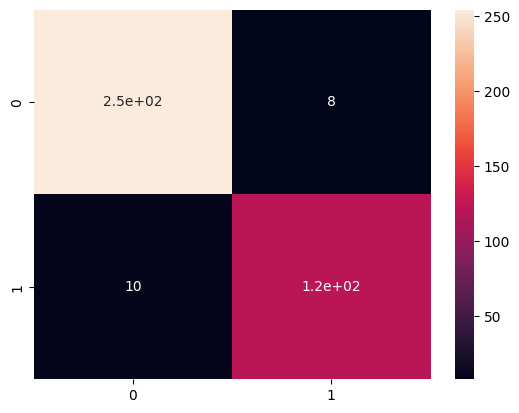

In [ ]:
import seaborn as sns
# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True)

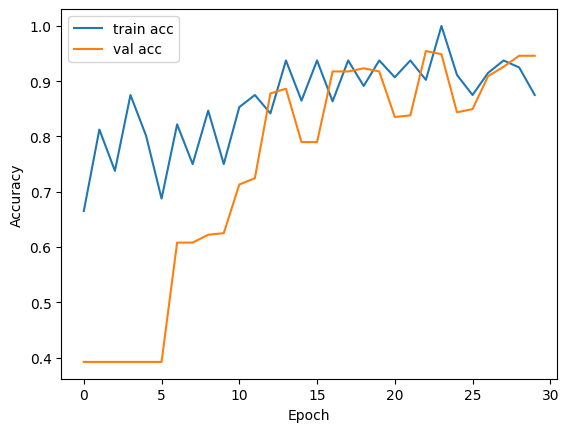

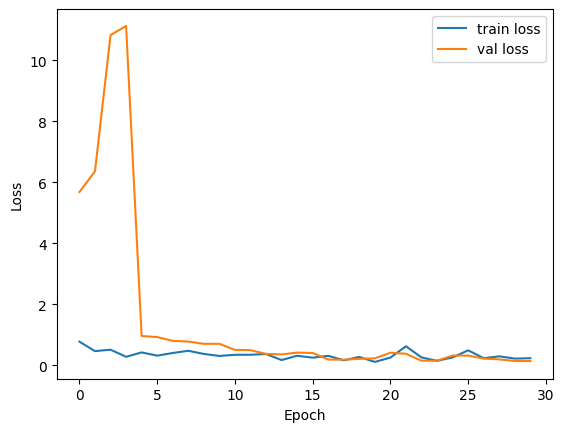

In [ ]:
import matplotlib.pyplot as plt

# Tracé de l'évolution de l'accuracy pendant l'entraînement
plt.plot(h.history['accuracy'], label='train acc')
plt.plot(h.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Tracé de l'évolution de la loss pendant l'entraînement
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


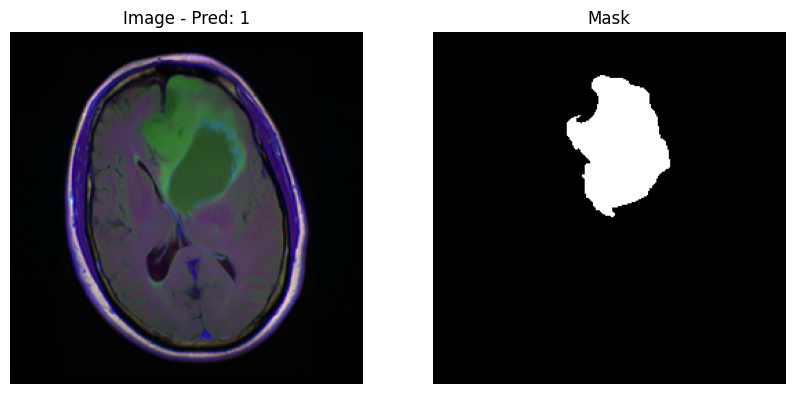

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


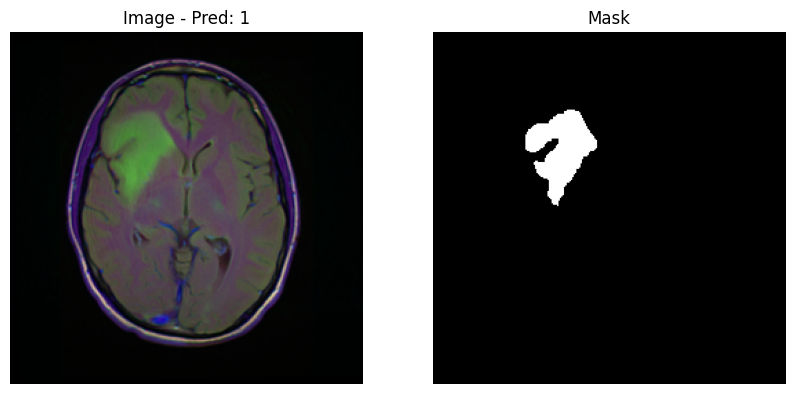

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


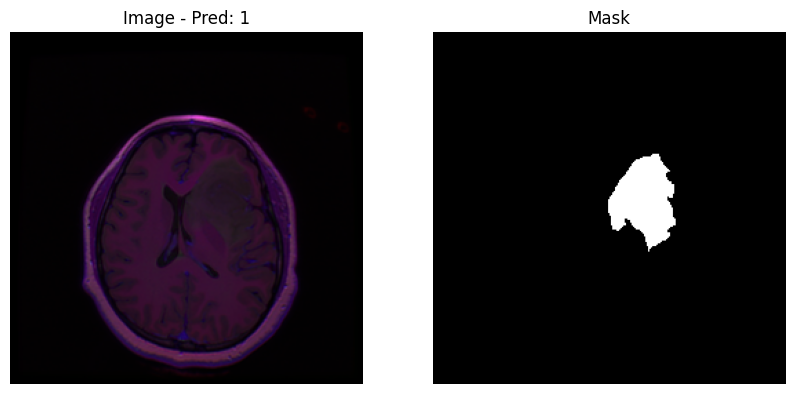

In [ ]:
# Sélectionner 3 indices aléatoires dans df_val
random_indices = random.sample(range(len(df_val)), 3)

for idx in random_indices:
    # Chemin de l'image et du mask
    img_path = df_val.iloc[idx]['image_path']
    mask_path = df_val.iloc[idx]['mask_path']

    # Charger l'image et le mask
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img) / 255.0

    mask = image.load_img(mask_path, color_mode="grayscale", target_size=(256, 256))
    mask_array = np.array(mask) / 255.0

    # Ajouter dimension batch pour prédiction
    img_array_batch = np.expand_dims(img_array, axis=0)

    # Prédiction du modèle
    pred = model1.predict(img_array_batch)
    pred_class = int(pred[0][0] > 0.5)

    # Affichage
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    axs[0].imshow(img)
    axs[0].set_title(f"Image - Pred: {pred_class}")
    axs[0].axis('off')

    axs[1].imshow(mask_array, cmap='gray')
    axs[1].set_title("Mask")
    axs[1].axis('off')

    plt.show()


# Modèle ResNet-50 de segmentation pour localiser la tumeur

**Split uniquement sur mask = 1**

In [ ]:
from sklearn.model_selection import train_test_split

df_final['mask'] = df_final['mask'].astype(int)
brain_df_mask = df_final[df_final['mask'] == 1].reset_index(drop=True)
print(brain_df_mask.shape)  # (1373, 4)

X_train, X_val = train_test_split(brain_df_mask, test_size=0.15, random_state=42, shuffle=True)
X_test,  X_val = train_test_split(X_val, test_size=0.5, random_state=42, shuffle=True)

print(f"Train size is {len(X_train)}, valid size is {len(X_val)} & test size is {len(X_test)}")

train_ids  = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids  = list(X_val.image_path)
val_mask = list(X_val.mask_path)

test_ids  = list(X_test.image_path)
test_mask = list(X_test.mask_path)

(1373, 3)
Train size is 1167, valid size is 103 & test size is 103


In [ ]:
brain_df_mask.head(10)

image_path  \
0  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...   
1  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_768...   
2  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...   
3  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_760...   
4  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_494...   
5  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_768...   
6  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_788...   
7  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_769...   
8  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...   
9  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...   

                                           mask_path  mask  
0  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...     1  
1  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_768...     1  
2  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...     1  
3  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_760...     1  
4  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_494...     1  
5  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_768...     1  
6  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_788...     1  
7  /content/Projet_RGD/Data/kaggle_3m/TCGA_HT_769...     1  
8  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...     1  
9  /content/Projet_RGD/Data/kaggle_3m/TCGA_CS_539...     1

In [ ]:
import tensorflow as tf
from skimage import io

class SegDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, ids, masks, batch_size=8, img_h=256, img_w=256, shuffle=True):
        self.ids = ids
        self.masks = masks
        self.batch_size = batch_size
        self.img_h = img_h
        self.img_w = img_w
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.ids) / self.batch_size))

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.ids))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        idxs = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_ids = [self.ids[i] for i in idxs]
        batch_masks = [self.masks[i] for i in idxs]
        return self.__data_generation(batch_ids, batch_masks)

    def __data_generation(self, batch_ids, batch_masks):
        X = np.empty((self.batch_size, self.img_h, self.img_w, 3), dtype=np.float32)
        y = np.empty((self.batch_size, self.img_h, self.img_w, 1), dtype=np.float32)

        for i, (img_path, mask_path) in enumerate(zip(batch_ids, batch_masks)):

            img = io.imread(str(img_path))
            img = cv2.resize(img, (self.img_w, self.img_h))
            img = img.astype(np.float32) / 255.0

            mask = io.imread(str(mask_path))
            if mask.ndim == 3:
                mask = mask[..., 0]
            mask = cv2.resize(mask, (self.img_w, self.img_h), interpolation=cv2.INTER_NEAREST)
            mask = (mask > 0).astype(np.float32)
            mask = np.expand_dims(mask, axis=-1)

            X[i] = img
            y[i] = mask

        return X, y

train_data = SegDataGenerator(train_ids, train_mask, batch_size=8, shuffle=True)
val_data   = SegDataGenerator(val_ids,   val_mask,   batch_size=8, shuffle=False)
test_data  = SegDataGenerator(test_ids,  test_mask,  batch_size=8, shuffle=False)


**Construction le modèle : ResNet encoder + Decoder**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def conv_block(x, filters):
    x = layers.Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    return x

def up_block(x, skip, filters):
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Concatenate()([x, skip])
    x = conv_block(x, filters)
    return x

def build_resnet50_unet(input_shape=(256,256,3), weights="imagenet", freeze_encoder=True):
    inputs = layers.Input(input_shape)

    # Encoder: ResNet50
    base = tf.keras.applications.ResNet50(
        include_top=False,
        weights=weights,
        input_tensor=inputs
    )

    # Skip connections
    s1 = base.get_layer("conv1_relu").output           # 128x128
    s2 = base.get_layer("conv2_block3_out").output     # 64x64
    s3 = base.get_layer("conv3_block4_out").output     # 32x32
    s4 = base.get_layer("conv4_block6_out").output     # 16x16
    b  = base.get_layer("conv5_block3_out").output     # 8x8

    if freeze_encoder:
        base.trainable = False

    # Decoder
    d1 = up_block(b,  s4, 256)   # 16x16
    d2 = up_block(d1, s3, 128)   # 32x32
    d3 = up_block(d2, s2, 64)    # 64x64
    d4 = up_block(d3, s1, 32)    # 128x128

    # Back to 256x256
    d5 = layers.UpSampling2D((2, 2))(d4)
    d5 = conv_block(d5, 16)

    outputs = layers.Conv2D(1, 1, padding="same", activation="sigmoid")(d5)

    return Model(inputs, outputs, name="ResNet50_UNet")

seg_model = build_resnet50_unet()
seg_model.summary()


Model: "ResNet50_UNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_8[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 32,603,633 (124.37 MB)

 Trainable params: 9,013,937 (34.39 MB)

 Non-trainable params: 23,589,696 (89.99 MB)

In [ ]:
import tensorflow.keras.backend as K

smooth = 1e-6

def tversky(y_true, y_pred, alpha=0.7):
    y_true = K.flatten(tf.cast(y_true, tf.float32))
    y_pred = K.flatten(tf.cast(y_pred, tf.float32))

    tp = K.sum(y_true * y_pred)
    fn = K.sum(y_true * (1 - y_pred))
    fp = K.sum((1 - y_true) * y_pred)

    return (tp + smooth) / (tp + alpha*fn + (1-alpha)*fp + smooth)

def focal_tversky_loss(y_true, y_pred, alpha=0.7, gamma=0.75):
    tv = tversky(y_true, y_pred, alpha=alpha)
    return K.pow((1 - tv), gamma)

def tversky_metric(y_true, y_pred):
    return tversky(y_true, y_pred, alpha=0.7)


**Entraînement**

In [ ]:
seg_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=focal_tversky_loss,
    metrics=[tversky_metric]
)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("ResNet50UNet_best.h5", save_best_only=True, monitor="val_loss", verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1),
]

history = seg_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.8706 - tversky_metric: 0.1684

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.88967, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 62s 174ms/step - loss: 0.8705 - tversky_metric: 0.1685 - val_loss: 0.8897 - val_tversky_metric: 0.1442 - learning_rate: 1.0000e-04
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.8367 - tversky_metric: 0.2111
Epoch 2: val_loss improved from 0.88967 to 0.86336, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - loss: 0.8366 - tversky_metric: 0.2112 - val_loss: 0.8634 - val_tversky_metric: 0.1777 - learning_rate: 1.0000e-04
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.8167 - tversky_metric: 0.2361
Epoch 3: val_loss did not improve from 0.86336
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.8166 - tversky_metric: 0.2362 - val_loss: 0.9239 - val_tversky_metric: 0.1001 - learning_rate: 1.0000e-04
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.7882 - tversky_metric: 0.2712
Epoch 4: val_loss did not improve from 0.86336
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.7881 - tversky_metric: 0.2713 - val_loss: 0.9208 - val_tversky_metric: 0.1041 - learning_rate: 1.0000e-04
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.7648 - tversky_metric: 0.2999
Epoch 5: val_loss improved from 0.86336 to 0.84358, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 121ms/step - loss: 0.7647 - tversky_metric: 0.3000 - val_loss: 0.8436 - val_tversky_metric: 0.2026 - learning_rate: 1.0000e-04
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.7415 - tversky_metric: 0.3281
Epoch 6: val_loss did not improve from 0.84358
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.7414 - tversky_metric: 0.3282 - val_loss: 0.9118 - val_tversky_metric: 0.1155 - learning_rate: 1.0000e-04
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.7070 - tversky_metric: 0.3695
Epoch 7: val_loss improved from 0.84358 to 0.79157, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.7070 - tversky_metric: 0.3695 - val_loss: 0.7916 - val_tversky_metric: 0.2673 - learning_rate: 1.0000e-04
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.6912 - tversky_metric: 0.3878
Epoch 8: val_loss did not improve from 0.79157
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.6911 - tversky_metric: 0.3879 - val_loss: 0.9251 - val_tversky_metric: 0.0983 - learning_rate: 1.0000e-04
Epoch 9/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.6609 - tversky_metric: 0.4230
Epoch 9: val_loss improved from 0.79157 to 0.74165, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 127ms/step - loss: 0.6608 - tversky_metric: 0.4231 - val_loss: 0.7416 - val_tversky_metric: 0.3281 - learning_rate: 1.0000e-04
Epoch 10/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.6399 - tversky_metric: 0.4473
Epoch 10: val_loss improved from 0.74165 to 0.72143, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.6398 - tversky_metric: 0.4475 - val_loss: 0.7214 - val_tversky_metric: 0.3522 - learning_rate: 1.0000e-04
Epoch 11/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5943 - tversky_metric: 0.4989
Epoch 11: val_loss did not improve from 0.72143
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.5942 - tversky_metric: 0.4989 - val_loss: 0.7967 - val_tversky_metric: 0.2612 - learning_rate: 1.0000e-04
Epoch 12/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5619 - tversky_metric: 0.5347
Epoch 12: val_loss improved from 0.72143 to 0.70486, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.5619 - tversky_metric: 0.5347 - val_loss: 0.7049 - val_tversky_metric: 0.3722 - learning_rate: 1.0000e-04
Epoch 13/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5338 - tversky_metric: 0.5651
Epoch 13: val_loss did not improve from 0.70486
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.5338 - tversky_metric: 0.5651 - val_loss: 0.7793 - val_tversky_metric: 0.2826 - learning_rate: 1.0000e-04
Epoch 14/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.5205 - tversky_metric: 0.5792
Epoch 14: val_loss did not improve from 0.70486
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.5204 - tversky_metric: 0.5793 - val_loss: 0.8279 - val_tversky_metric: 0.2223 - learning_rate: 1.0000e-04
Epoch 15/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.4897 - tversky_metric: 0.6121
Epoch 15: val_loss did not improve from 0.70486
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.4897 - tversky_metric: 0.6121 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.4500 - tversky_metric: 0.6526 - val_loss: 0.6445 - val_tversky_metric: 0.4413 - learning_rate: 1.0000e-04
Epoch 18/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.4302 - tversky_metric: 0.6739
Epoch 18: val_loss did not improve from 0.64450
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.4302 - tversky_metric: 0.6739 - val_loss: 0.7933 - val_tversky_metric: 0.2654 - learning_rate: 1.0000e-04
Epoch 19/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.4087 - tversky_metric: 0.6952
Epoch 19: val_loss did not improve from 0.64450
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.4087 - tversky_metric: 0.6952 - val_loss: 0.8420 - val_tversky_metric: 0.2036 - learning_rate: 1.0000e-04
Epoch 20/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.3842 - tversky_metric: 0.7191
Epoch 20: val_loss improved from 0.64450 to 0.47665, saving model to ResNet50UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 21s 122ms/step - loss: 0.3842 - tversky_metric: 0.7191 - val_loss: 0.4767 - val_tversky_metric: 0.6268 - learning_rate: 1.0000e-04
Epoch 21/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.3697 - tversky_metric: 0.7326
Epoch 21: val_loss did not improve from 0.47665
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.3697 - tversky_metric: 0.7327 - val_loss: 0.6026 - val_tversky_metric: 0.4899 - learning_rate: 1.0000e-04
Epoch 22/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.3559 - tversky_metric: 0.7461
Epoch 22: val_loss did not improve from 0.47665
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.3559 - tversky_metric: 0.7462 - val_loss: 0.8199 - val_tversky_metric: 0.2317 - learning_rate: 1.0000e-04
Epoch 23/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.3479 - tversky_metric: 0.7535
Epoch 23: val_loss did not improve from 0.47665
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.3478 - tversky_metric: 0.7536 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.2891 - tversky_metric: 0.8075 - val_loss: 0.3697 - val_tversky_metric: 0.7336 - learning_rate: 5.0000e-05
Epoch 28/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2750 - tversky_metric: 0.8194
Epoch 28: val_loss did not improve from 0.36974
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.2751 - tversky_metric: 0.8194 - val_loss: 0.4179 - val_tversky_metric: 0.6858 - learning_rate: 5.0000e-05
Epoch 29/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2787 - tversky_metric: 0.8164
Epoch 29: val_loss did not improve from 0.36974
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - loss: 0.2787 - tversky_metric: 0.8165 - val_loss: 0.3770 - val_tversky_metric: 0.7266 - learning_rate: 5.0000e-05
Epoch 30/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2636 - tversky_metric: 0.8298
Epoch 30: val_loss did not improve from 0.36974
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.2637 - tversky_metric: 0.8298 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - loss: 0.2544 - tversky_metric: 0.8374 - val_loss: 0.2742 - val_tversky_metric: 0.8212 - learning_rate: 2.5000e-05
Epoch 34/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.2490 - tversky_metric: 0.8419
Epoch 34: val_loss did not improve from 0.27420
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 117ms/step - loss: 0.2490 - tversky_metric: 0.8419 - val_loss: 0.3514 - val_tversky_metric: 0.7506 - learning_rate: 2.5000e-05
Epoch 35/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2445 - tversky_metric: 0.8457
Epoch 35: val_loss did not improve from 0.27420
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.2444 - tversky_metric: 0.8457 - val_loss: 0.3831 - val_tversky_metric: 0.7205 - learning_rate: 2.5000e-05
Epoch 36/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2332 - tversky_metric: 0.8553
Epoch 36: val_loss did not improve from 0.27420
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - loss: 0.2333 - tversky_metric: 0.8553 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.2299 - tversky_metric: 0.8581 - val_loss: 0.2731 - val_tversky_metric: 0.8222 - learning_rate: 2.5000e-05
Epoch 39/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.2331 - tversky_metric: 0.8551
Epoch 39: val_loss did not improve from 0.27312
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.2331 - tversky_metric: 0.8551 - val_loss: 0.2987 - val_tversky_metric: 0.7996 - learning_rate: 2.5000e-05
Epoch 40/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2251 - tversky_metric: 0.8620
Epoch 40: val_loss did not improve from 0.27312
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.2251 - tversky_metric: 0.8620 - val_loss: 0.2908 - val_tversky_metric: 0.8069 - learning_rate: 2.5000e-05
Epoch 41/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2297 - tversky_metric: 0.8578
Epoch 41: val_loss did not improve from 0.27312
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.2296 - tversky_metric: 0.8578 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.2185 - tversky_metric: 0.8677 - val_loss: 0.2630 - val_tversky_metric: 0.8306 - learning_rate: 2.5000e-05
Epoch 44/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2133 - tversky_metric: 0.8716
Epoch 44: val_loss did not improve from 0.26303
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.2134 - tversky_metric: 0.8716 - val_loss: 0.2984 - val_tversky_metric: 0.7994 - learning_rate: 2.5000e-05
Epoch 45/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2197 - tversky_metric: 0.8658
Epoch 45: val_loss did not improve from 0.26303
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.2197 - tversky_metric: 0.8659 - val_loss: 0.2770 - val_tversky_metric: 0.8187 - learning_rate: 2.5000e-05
Epoch 46/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.2240 - tversky_metric: 0.8621
Epoch 46: val_loss did not improve from 0.26303
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 114ms/step - loss: 0.2239 - tversky_metric: 0.8622 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 18s 122ms/step - loss: 0.2004 - tversky_metric: 0.8816 - val_loss: 0.2399 - val_tversky_metric: 0.8504 - learning_rate: 1.2500e-05
Epoch 50/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.1938 - tversky_metric: 0.8871
Epoch 50: val_loss did not improve from 0.23993
145/145 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - loss: 0.1938 - tversky_metric: 0.8870 - val_loss: 0.2534 - val_tversky_metric: 0.8389 - learning_rate: 1.2500e-05
Restoring model weights from the end of the best epoch: 49.


**Evaluation de la performance**

In [ ]:
print("History keys:", history.history.keys())

metric_key = None
for k in history.history.keys():
    if ("tversky" in k.lower()) and (not k.lower().startswith("val_")) and (k.lower() != "loss"):
        metric_key = k
        break

if metric_key is None:
    raise ValueError("Impossible de trouver la métrique Tversky. Regarde les keys ci-dessus.")

val_metric_key = "val_" + metric_key
val_tversky = history.history[val_metric_key]

# Meilleure epoch (min val_loss)
import numpy as np
val_loss = history.history["val_loss"]
best_epoch = int(np.argmin(val_loss)) + 1

print("\n BEST EPOCH (min val_loss) ")
print(f"Best epoch       : {best_epoch}")
print(f"Best val_loss    : {val_loss[best_epoch-1]:.6f}")
print(f"Best val_tversky : {val_tversky[best_epoch-1]:.6f}")

test_metrics = seg_model.evaluate(test_data, verbose=1)

print("\n TEST RESULTS ")
for name, value in zip(seg_model.metrics_names, test_metrics):
    print(f"{name}: {value:.6f}")


History keys: dict_keys(['loss', 'tversky_metric', 'val_loss', 'val_tversky_metric', 'learning_rate'])

 BEST EPOCH (min val_loss) 
Best epoch       : 49
Best val_loss    : 0.239927
Best val_tversky : 0.850414


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.2453 - tversky_metric: 0.8454

 TEST RESULTS 
loss: 0.250802
compile_metrics: 0.840612


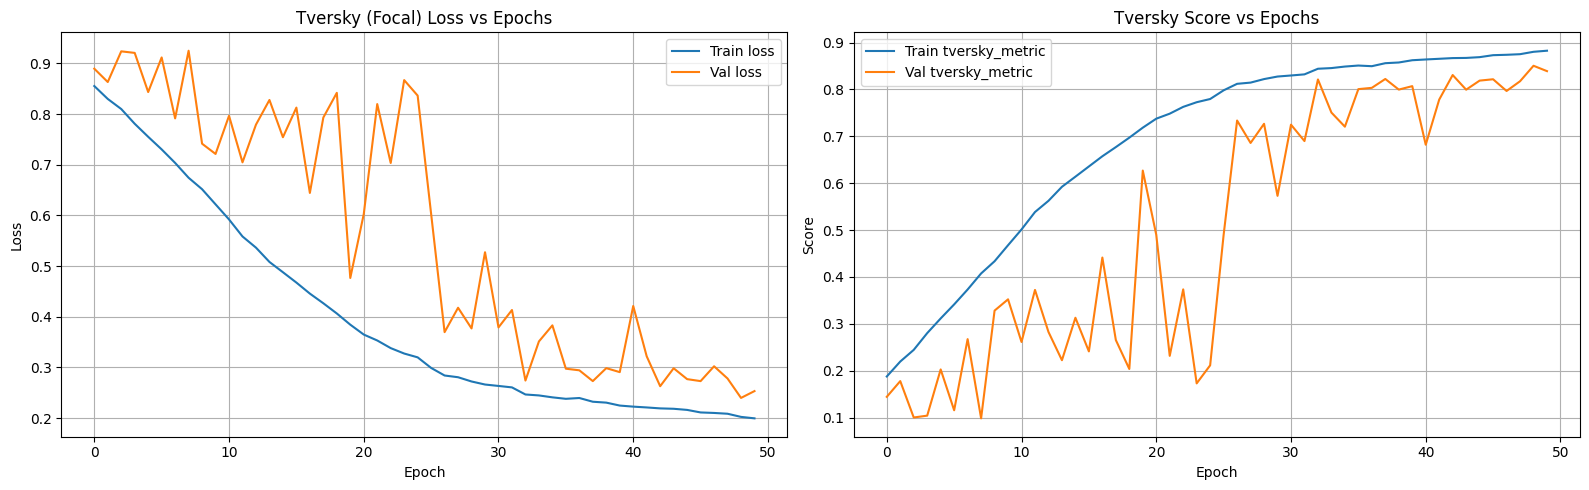

In [ ]:
import matplotlib.pyplot as plt

metric_key = None
for k in history.history.keys():
    if "tversky" in k and not k.startswith("val_"):
        metric_key = k
        break

if metric_key is None:
    raise ValueError("Impossible de trouver la métrique Tversky dans history.")

val_metric_key = "val_" + metric_key

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Graphique 1 : Tversky (Focal) Loss
axs[0].plot(history.history["loss"], label="Train loss")
axs[0].plot(history.history["val_loss"], label="Val loss")
axs[0].set_title("Tversky (Focal) Loss vs Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# Graphique 2 : Tversky Score
axs[1].plot(history.history[metric_key], label=f"Train {metric_key}")
axs[1].plot(history.history[val_metric_key], label=f"Val {metric_key}")
axs[1].set_title("Tversky Score vs Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Score")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


**Test**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


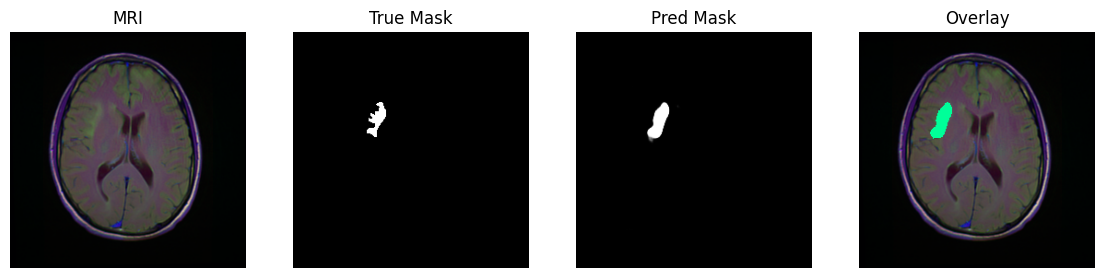

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


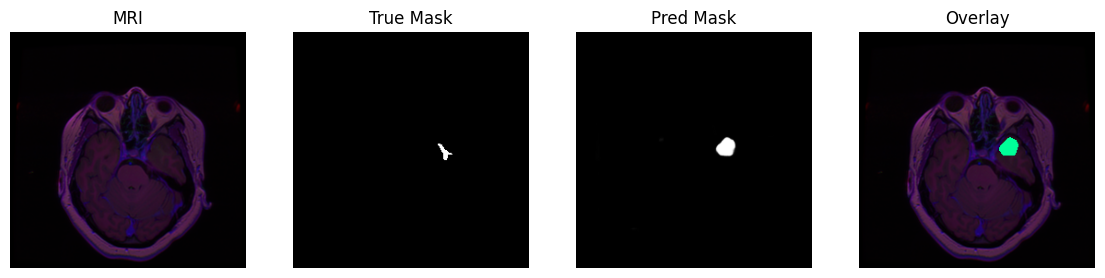

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


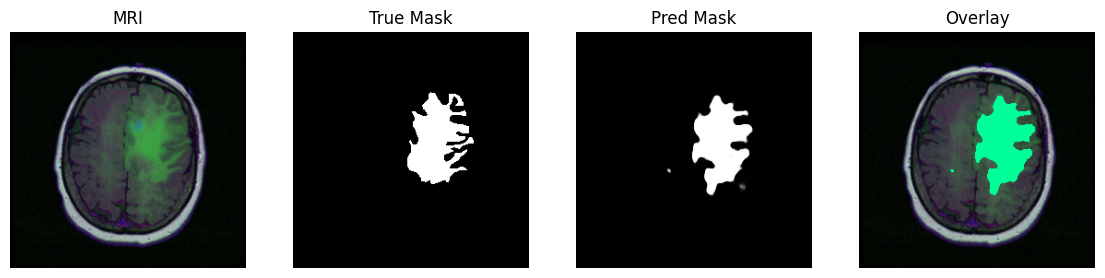

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


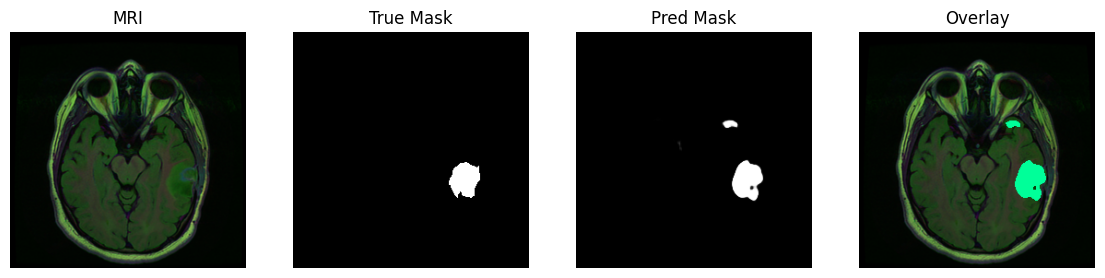

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


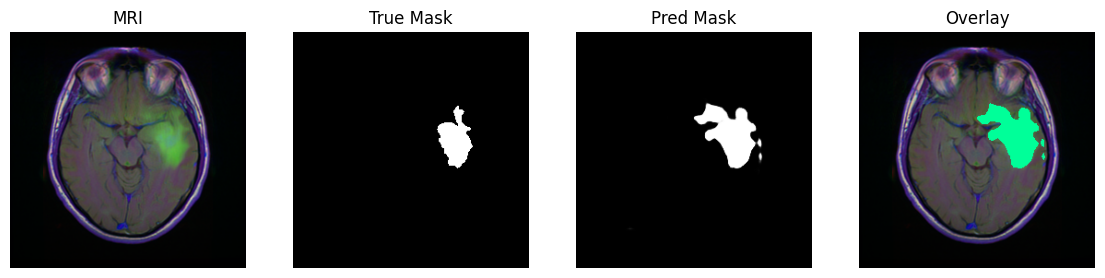

In [ ]:
import matplotlib.pyplot as plt

def predict_and_show(model, ids, masks, n=5, thr=0.5):
    idxs = np.random.choice(len(ids), size=n, replace=False)

    for k in idxs:
        img = io.imread(str(ids[k]))
        img = cv2.resize(img, (256,256))
        img_in = img.astype(np.float32) / 255.0

        true_mask = io.imread(str(masks[k]))
        if true_mask.ndim == 3:
            true_mask = true_mask[...,0]
        true_mask = cv2.resize(true_mask, (256,256), interpolation=cv2.INTER_NEAREST)
        true_mask_bin = (true_mask > 0).astype(np.float32)

        pred = model.predict(img_in[None, ...])[0, ..., 0]
        pred_bin = (pred > thr).astype(np.float32)

        overlay = img_in.copy()
        overlay[pred_bin == 1] = [0.0, 1.0, 0.6]

        plt.figure(figsize=(14,4))
        plt.subplot(1,4,1); plt.title("MRI"); plt.imshow(img); plt.axis("off")
        plt.subplot(1,4,2); plt.title("True Mask"); plt.imshow(true_mask_bin, cmap="gray"); plt.axis("off")
        plt.subplot(1,4,3); plt.title("Pred Mask"); plt.imshow(pred, cmap="gray"); plt.axis("off")
        plt.subplot(1,4,4); plt.title("Overlay"); plt.imshow(overlay); plt.axis("off")
        plt.show()

predict_and_show(seg_model, test_ids, test_mask, n=5)


# Modèle U-Net de segmentation pour localiser la tumeur

In [17]:
import numpy as np
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Split uniquement sur mask = 1**


In [18]:
# Filtrer uniquement les images avec tumeurs
brain_df_mask = df_final[df_final['mask'] == 1].reset_index(drop=True)
print(f"Nombre d'images avec tumeurs : {brain_df_mask.shape[0]}")

# Split : 85% train, 7.5% val, 7.5% test
X_train, X_val = train_test_split(brain_df_mask, test_size=0.15, random_state=42, shuffle=True)
X_test, X_val = train_test_split(X_val, test_size=0.5, random_state=42, shuffle=True)

print(f"Train size is {len(X_train)}, valid size is {len(X_val)} & test size is {len(X_test)}")

train_ids = list(X_train.image_path)
train_mask = list(X_train.mask_path)

val_ids = list(X_val.image_path)
val_mask = list(X_val.mask_path)

test_ids = list(X_test.image_path)
test_mask = list(X_test.mask_path)

Nombre d'images avec tumeurs : 1373
Train size is 1167, valid size is 103 & test size is 103


**Générateur de données**

In [ ]:
class SegDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, ids, masks, batch_size=8, img_h=256, img_w=256, shuffle=True):
        self.ids = ids
        self.masks = masks
        self.batch_size = batch_size
        self.img_h = img_h
        self.img_w = img_w
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.ids) / self.batch_size))

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.ids))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __getitem__(self, index):
        idxs = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        batch_ids = [self.ids[i] for i in idxs]
        batch_masks = [self.masks[i] for i in idxs]
        return self.__data_generation(batch_ids, batch_masks)
    def __data_generation(self, batch_ids, batch_masks):
        X = np.empty((self.batch_size, self.img_h, self.img_w, 3), dtype=np.float32)
        y = np.empty((self.batch_size, self.img_h, self.img_w, 1), dtype=np.float32)

        for i, (img_path, mask_path) in enumerate(zip(batch_ids, batch_masks)):
            img = io.imread(str(img_path))
            img = cv2.resize(img, (self.img_w, self.img_h))
            img = img.astype(np.float32) / 255.0

            mask = io.imread(str(mask_path))
            if mask.ndim == 3:
                mask = mask[..., 0]
            mask = cv2.resize(mask, (self.img_w, self.img_h), interpolation=cv2.INTER_NEAREST)
            mask = (mask > 0).astype(np.float32)
            mask = np.expand_dims(mask, axis=-1)

            X[i] = img
            y[i] = mask

        return X, y

train_data = SegDataGenerator(train_ids, train_mask, batch_size=8, shuffle=True)
val_data = SegDataGenerator(val_ids, val_mask, batch_size=8, shuffle=False)
test_data = SegDataGenerator(test_ids, test_mask, batch_size=8, shuffle=False)

**Construction du modèle U-Net**

In [20]:
def conv_block(x, filters):
    """Bloc de convolution : 2x(Conv2D + BatchNorm + ReLU)"""
    x = Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(filters, 3, padding="same", kernel_initializer="he_normal")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def up_block(x, skip, filters):
    """Bloc de upsampling + concatenation + convolution"""
    x = UpSampling2D((2, 2))(x)
    x = Concatenate()([x, skip])
    x = conv_block(x, filters)
    return x
def build_unet(input_shape=(256, 256, 3)):
    """
    Architecture U-Net classique
    - Encoder : extraction de features à différentes échelles
    - Decoder : reconstruction avec skip connections
    """
    inputs = Input(input_shape)

    # Encoder
    c1 = conv_block(inputs, 64)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = conv_block(p1, 128)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = conv_block(p2, 256)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = conv_block(p3, 512)
    p4 = MaxPooling2D((2, 2))(c4)

    # Bottleneck
    b = conv_block(p4, 1024)

    # Decoder
    d1 = up_block(b, c4, 512)
    d2 = up_block(d1, c3, 256)
    d3 = up_block(d2, c2, 128)
    d4 = up_block(d3, c1, 64)

    # Sortie
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    return Model(inputs, outputs, name="U-Net")

unet_model = build_unet()
unet_model.summary()


Model: "U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,402,497 (119.79 MB)

 Trainable params: 31,390,721 (119.75 MB)

 Non-trainable params: 11,776 (46.00 KB)

**Entraînement**

In [ ]:
unet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=focal_tversky_loss,
    metrics=[tversky_metric]
)

callbacks = [
    ModelCheckpoint("UNet_best.h5", save_best_only=True, monitor="val_loss", verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1, min_lr=1e-6),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, verbose=1)
]

history = unet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=callbacks
)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.7814 - tversky_metric: 0.2778

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 0.84895, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 165s 591ms/step - loss: 0.7809 - tversky_metric: 0.2784 - val_loss: 0.8490 - val_tversky_metric: 0.1958 - learning_rate: 1.0000e-04
Epoch 2/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.6088 - tversky_metric: 0.4819
Epoch 2: val_loss improved from 0.84895 to 0.65094, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 81s 555ms/step - loss: 0.6086 - tversky_metric: 0.4821 - val_loss: 0.6509 - val_tversky_metric: 0.4342 - learning_rate: 1.0000e-04
Epoch 3/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - loss: 0.5220 - tversky_metric: 0.5774
Epoch 3: val_loss improved from 0.65094 to 0.53384, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 86s 592ms/step - loss: 0.5219 - tversky_metric: 0.5775 - val_loss: 0.5338 - val_tversky_metric: 0.5659 - learning_rate: 1.0000e-04
Epoch 4/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - loss: 0.4500 - tversky_metric: 0.6535
Epoch 4: val_loss improved from 0.53384 to 0.41250, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 89s 616ms/step - loss: 0.4499 - tversky_metric: 0.6537 - val_loss: 0.4125 - val_tversky_metric: 0.6923 - learning_rate: 1.0000e-04
Epoch 5/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - loss: 0.3808 - tversky_metric: 0.7221
Epoch 5: val_loss improved from 0.41250 to 0.36919, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 90s 621ms/step - loss: 0.3807 - tversky_metric: 0.7222 - val_loss: 0.3692 - val_tversky_metric: 0.7346 - learning_rate: 1.0000e-04
Epoch 6/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.3445 - tversky_metric: 0.7566
Epoch 6: val_loss improved from 0.36919 to 0.31798, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 90s 621ms/step - loss: 0.3443 - tversky_metric: 0.7567 - val_loss: 0.3180 - val_tversky_metric: 0.7825 - learning_rate: 1.0000e-04
Epoch 7/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - loss: 0.2951 - tversky_metric: 0.8022
Epoch 7: val_loss improved from 0.31798 to 0.28818, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 91s 626ms/step - loss: 0.2950 - tversky_metric: 0.8023 - val_loss: 0.2882 - val_tversky_metric: 0.8090 - learning_rate: 1.0000e-04
Epoch 8/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - loss: 0.2566 - tversky_metric: 0.8358
Epoch 8: val_loss improved from 0.28818 to 0.26657, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 90s 619ms/step - loss: 0.2566 - tversky_metric: 0.8358 - val_loss: 0.2666 - val_tversky_metric: 0.8276 - learning_rate: 1.0000e-04
Epoch 9/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.2410 - tversky_metric: 0.8483
Epoch 9: val_loss did not improve from 0.26657
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 545ms/step - loss: 0.2411 - tversky_metric: 0.8482 - val_loss: 0.4025 - val_tversky_metric: 0.7015 - learning_rate: 1.0000e-04
Epoch 10/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - loss: 0.2314 - tversky_metric: 0.8565
Epoch 10: val_loss improved from 0.26657 to 0.23231, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 90s 621ms/step - loss: 0.2313 - tversky_metric: 0.8565 - val_loss: 0.2323 - val_tversky_metric: 0.8565 - learning_rate: 1.0000e-04
Epoch 11/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.2069 - tversky_metric: 0.8762
Epoch 11: val_loss improved from 0.23231 to 0.19284, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 95s 653ms/step - loss: 0.2069 - tversky_metric: 0.8762 - val_loss: 0.1928 - val_tversky_metric: 0.8883 - learning_rate: 1.0000e-04
Epoch 12/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.1929 - tversky_metric: 0.8874
Epoch 12: val_loss improved from 0.19284 to 0.19070, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 90s 624ms/step - loss: 0.1929 - tversky_metric: 0.8874 - val_loss: 0.1907 - val_tversky_metric: 0.8900 - learning_rate: 1.0000e-04
Epoch 13/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - loss: 0.1802 - tversky_metric: 0.8973
Epoch 13: val_loss did not improve from 0.19070
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 545ms/step - loss: 0.1801 - tversky_metric: 0.8973 - val_loss: 0.1943 - val_tversky_metric: 0.8871 - learning_rate: 1.0000e-04
Epoch 14/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - loss: 0.1712 - tversky_metric: 0.9042
Epoch 14: val_loss improved from 0.19070 to 0.17546, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 89s 614ms/step - loss: 0.1712 - tversky_metric: 0.9042 - val_loss: 0.1755 - val_tversky_metric: 0.9013 - learning_rate: 1.0000e-04
Epoch 15/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - loss: 0.1682 - tversky_metric: 0.9064
Epoch 15: val_loss did not improve from 0.17546
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 544ms/step - loss: 0.1682 - tversky_metric: 0.9064 - val_loss: 0.1766 - val_tversky_metric: 0.9006 - learning_rate: 1.0000e-04
Epoch 16/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - loss: 0.1702 - tversky_metric: 0.9044
Epoch 16: val_loss improved from 0.17546 to 0.17221, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 89s 617ms/step - loss: 0.1702 - tversky_metric: 0.9045 - val_loss: 0.1722 - val_tversky_metric: 0.9039 - learning_rate: 1.0000e-04
Epoch 17/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.1648 - tversky_metric: 0.9086
Epoch 17: val_loss did not improve from 0.17221
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 545ms/step - loss: 0.1649 - tversky_metric: 0.9086 - val_loss: 0.1963 - val_tversky_metric: 0.8854 - learning_rate: 1.0000e-04
Epoch 18/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - loss: 0.1693 - tversky_metric: 0.9051
Epoch 18: val_loss improved from 0.17221 to 0.15589, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 89s 616ms/step - loss: 0.1692 - tversky_metric: 0.9052 - val_loss: 0.1559 - val_tversky_metric: 0.9157 - learning_rate: 1.0000e-04
Epoch 19/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - loss: 0.1519 - tversky_metric: 0.9179
Epoch 19: val_loss did not improve from 0.15589
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 544ms/step - loss: 0.1519 - tversky_metric: 0.9178 - val_loss: 0.1637 - val_tversky_metric: 0.9101 - learning_rate: 1.0000e-04
Epoch 20/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.1451 - tversky_metric: 0.9231
Epoch 20: val_loss did not improve from 0.15589
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 542ms/step - loss: 0.1451 - tversky_metric: 0.9231 - val_loss: 0.1642 - val_tversky_metric: 0.9096 - learning_rate: 1.0000e-04
Epoch 21/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - loss: 0.1403 - tversky_metric: 0.9265
Epoch 21: val_loss did not improve from 0.15589
145/145 ━━━━━━━━━━━━━━━━━━━━ 78s 540ms/step - loss: 0.1403 - tversky_metric: 0.9265 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 89s 617ms/step - loss: 0.1380 - tversky_metric: 0.9279 - val_loss: 0.1521 - val_tversky_metric: 0.9184 - learning_rate: 1.0000e-04
Epoch 23/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - loss: 0.1512 - tversky_metric: 0.9188
Epoch 23: val_loss did not improve from 0.15215
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 546ms/step - loss: 0.1512 - tversky_metric: 0.9188 - val_loss: 0.2473 - val_tversky_metric: 0.8420 - learning_rate: 1.0000e-04
Epoch 24/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.1385 - tversky_metric: 0.9277
Epoch 24: val_loss did not improve from 0.15215
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 542ms/step - loss: 0.1385 - tversky_metric: 0.9277 - val_loss: 0.1558 - val_tversky_metric: 0.9157 - learning_rate: 1.0000e-04
Epoch 25/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.1351 - tversky_metric: 0.9300
Epoch 25: val_loss improved from 0.15215 to 0.13759, saving model to UNet_best.h5


145/145 ━━━━━━━━━━━━━━━━━━━━ 95s 659ms/step - loss: 0.1351 - tversky_metric: 0.9300 - val_loss: 0.1376 - val_tversky_metric: 0.9286 - learning_rate: 1.0000e-04
Epoch 26/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - loss: 0.1216 - tversky_metric: 0.9392
Epoch 26: val_loss did not improve from 0.13759
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 547ms/step - loss: 0.1216 - tversky_metric: 0.9391 - val_loss: 0.1568 - val_tversky_metric: 0.9151 - learning_rate: 1.0000e-04
Epoch 27/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.1224 - tversky_metric: 0.9385
Epoch 27: val_loss did not improve from 0.13759
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 542ms/step - loss: 0.1224 - tversky_metric: 0.9385 - val_loss: 0.1510 - val_tversky_metric: 0.9192 - learning_rate: 1.0000e-04
Epoch 28/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.1264 - tversky_metric: 0.9358
Epoch 28: val_loss did not improve from 0.13759
145/145 ━━━━━━━━━━━━━━━━━━━━ 78s 541ms/step - loss: 0.1264 - tversky_metric: 0.9358 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 93s 643ms/step - loss: 0.1157 - tversky_metric: 0.9433 - val_loss: 0.1362 - val_tversky_metric: 0.9296 - learning_rate: 5.0000e-05
Epoch 32/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - loss: 0.1158 - tversky_metric: 0.9431
Epoch 32: val_loss did not improve from 0.13623
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 547ms/step - loss: 0.1158 - tversky_metric: 0.9431 - val_loss: 0.1437 - val_tversky_metric: 0.9244 - learning_rate: 5.0000e-05
Epoch 33/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - loss: 0.1075 - tversky_metric: 0.9485
Epoch 33: val_loss did not improve from 0.13623
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 547ms/step - loss: 0.1075 - tversky_metric: 0.9485 - val_loss: 0.1434 - val_tversky_metric: 0.9246 - learning_rate: 5.0000e-05
Epoch 34/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.1051 - tversky_metric: 0.9499
Epoch 34: val_loss did not improve from 0.13623
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 542ms/step - loss: 0.1051 - tversky_metric: 0.9499 - val_l

145/145 ━━━━━━━━━━━━━━━━━━━━ 96s 662ms/step - loss: 0.1021 - tversky_metric: 0.9519 - val_loss: 0.1361 - val_tversky_metric: 0.9297 - learning_rate: 5.0000e-05
Epoch 37/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - loss: 0.0987 - tversky_metric: 0.9541
Epoch 37: val_loss did not improve from 0.13606
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 547ms/step - loss: 0.0987 - tversky_metric: 0.9541 - val_loss: 0.1401 - val_tversky_metric: 0.9269 - learning_rate: 5.0000e-05
Epoch 38/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - loss: 0.0975 - tversky_metric: 0.9548
Epoch 38: val_loss did not improve from 0.13606
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 543ms/step - loss: 0.0975 - tversky_metric: 0.9548 - val_loss: 0.1372 - val_tversky_metric: 0.9289 - learning_rate: 5.0000e-05
Epoch 39/50
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - loss: 0.0920 - tversky_metric: 0.9582
Epoch 39: val_loss did not improve from 0.13606
145/145 ━━━━━━━━━━━━━━━━━━━━ 79s 542ms/step - loss: 0.0920 - tversky_metric: 0.9582 - val_l

**Evaluation de la performance**

In [ ]:
print("History keys:", history.history.keys())

# Identifier la clé de la métrique Tversky
metric_key = None
for k in history.history.keys():
    if ("tversky" in k.lower()) and (not k.lower().startswith("val_")) and (k.lower() != "loss"):
        metric_key = k
        break

if metric_key is None:
    raise ValueError("Impossible de trouver la métrique Tversky")

val_metric_key = "val_" + metric_key

# Meilleure epoch
val_loss = history.history["val_loss"]
val_tversky = history.history[val_metric_key]
best_epoch = int(np.argmin(val_loss)) + 1

print(f"\n BEST EPOCH (min val_loss)")
print(f"Best epoch       : {best_epoch}")
print(f"Best val_loss    : {val_loss[best_epoch-1]:.6f}")
print(f"Best val_tversky : {val_tversky[best_epoch-1]:.6f}")

# Test
test_metrics = unet_model.evaluate(test_data, verbose=1)

print(f"\n TEST RESULTS")
for name, value in zip(unet_model.metrics_names, test_metrics):
    print(f"{name}: {value:.6f}")

History keys: dict_keys(['loss', 'tversky_metric', 'val_loss', 'val_tversky_metric', 'learning_rate'])

 BEST EPOCH (min val_loss)
Best epoch       : 36
Best val_loss    : 0.136059
Best val_tversky : 0.929697


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 0.1586 - tversky_metric: 0.9132

 TEST RESULTS
loss: 0.169790
compile_metrics: 0.904960


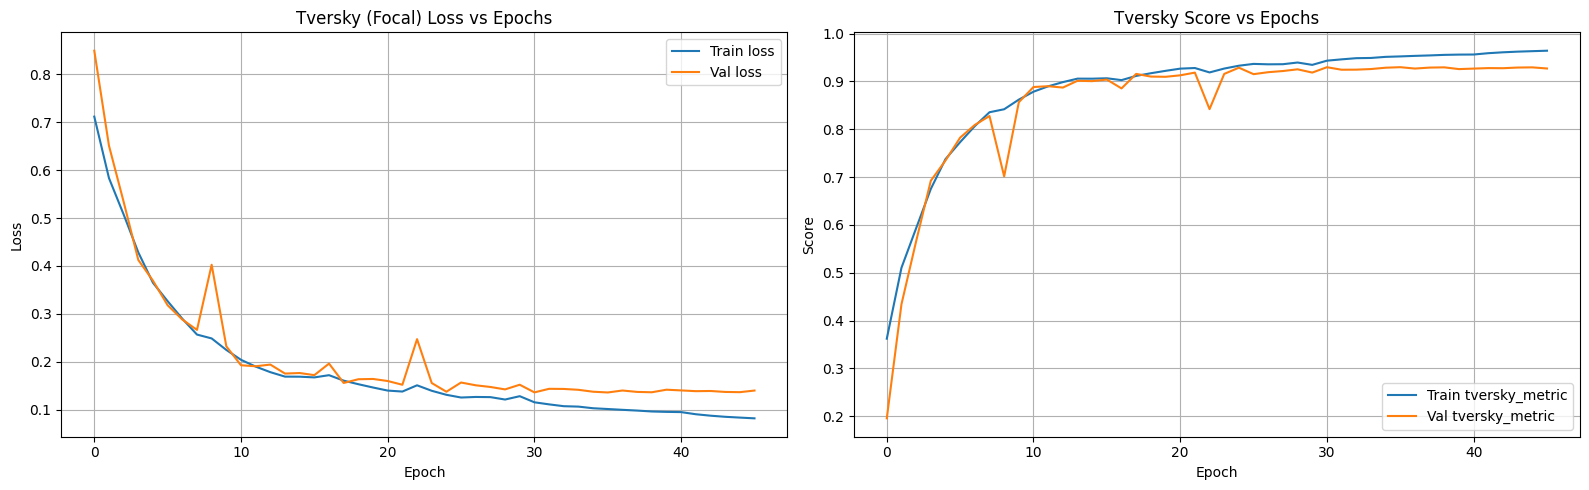

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Loss
axs[0].plot(history.history["loss"], label="Train loss")
axs[0].plot(history.history["val_loss"], label="Val loss")
axs[0].set_title("Tversky (Focal) Loss vs Epochs")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# Tversky Score
axs[1].plot(history.history[metric_key], label=f"Train {metric_key}")
axs[1].plot(history.history[val_metric_key], label=f"Val {metric_key}")
axs[1].set_title("Tversky Score vs Epochs")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Score")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

**Test**

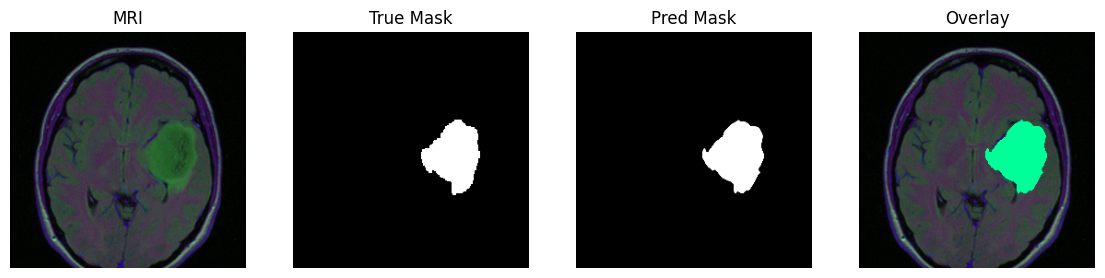

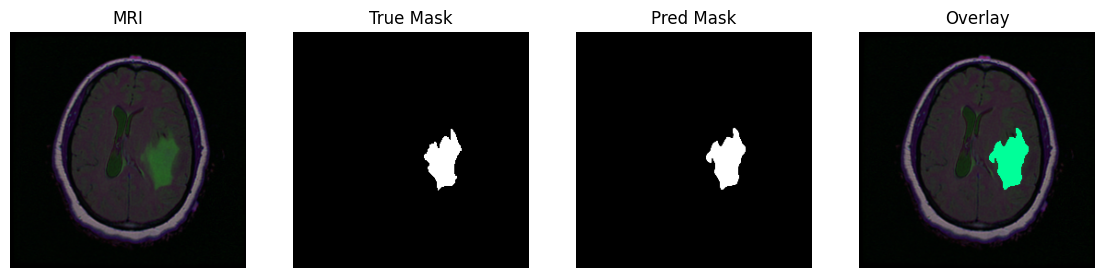

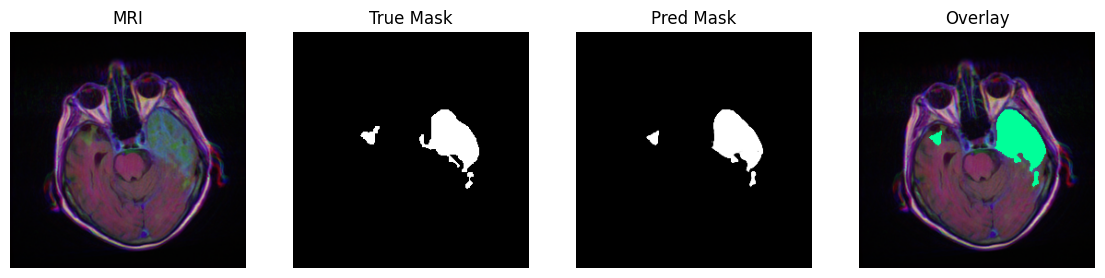

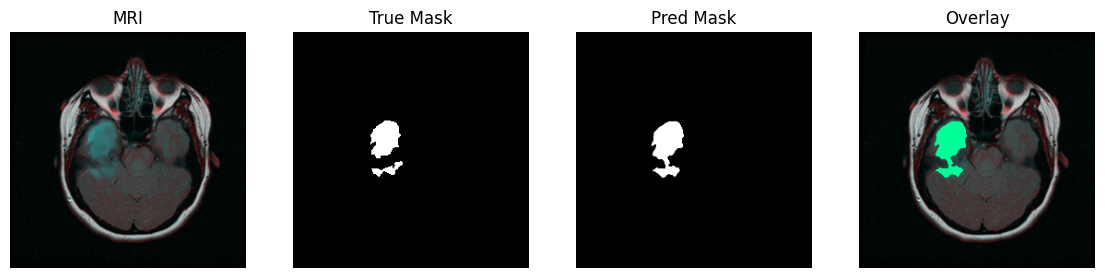

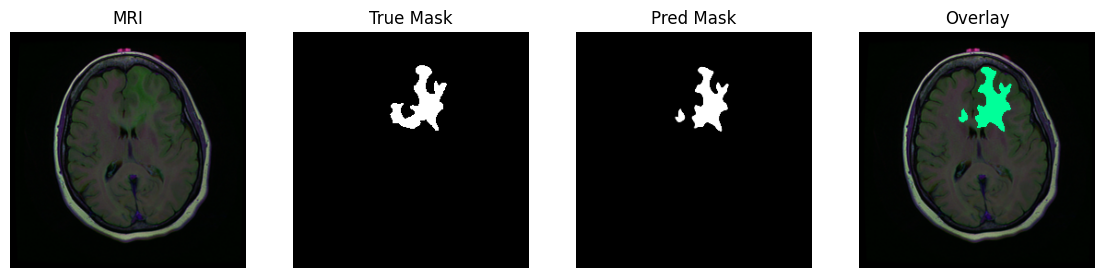

In [ ]:
def predict_and_show(model, ids, masks, n=5, thr=0.5):
    """Affiche n prédictions aléatoires"""
    idxs = np.random.choice(len(ids), size=n, replace=False)

    for k in idxs:
        img = io.imread(str(ids[k]))
        img = cv2.resize(img, (256, 256))
        img_in = img.astype(np.float32) / 255.0

        true_mask = io.imread(str(masks[k]))
        if true_mask.ndim == 3:
            true_mask = true_mask[..., 0]
        true_mask = cv2.resize(true_mask, (256, 256), interpolation=cv2.INTER_NEAREST)
        true_mask_bin = (true_mask > 0).astype(np.float32)

        pred = model.predict(img_in[None, ...], verbose=0)[0, ..., 0]
        pred_bin = (pred > thr).astype(np.float32)

        overlay = img_in.copy()
        overlay[pred_bin == 1] = [0.0, 1.0, 0.6]

        plt.figure(figsize=(14, 4))
        plt.subplot(1, 4, 1)
        plt.title("MRI")
        plt.imshow(img)
        plt.axis("off")

        plt.subplot(1, 4, 2)
        plt.title("True Mask")
        plt.imshow(true_mask_bin, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 4, 3)
        plt.title("Pred Mask")
        plt.imshow(pred, cmap="gray")
        plt.axis("off")

        plt.subplot(1, 4, 4)
        plt.title("Overlay")
        plt.imshow(overlay)
        plt.axis("off")

        plt.show()

predict_and_show(unet_model, test_ids, test_mask, n=5)

# Combinaison: Classification + Segmentation

## Prétraitement de l'image

In [10]:
def preprocess_image(img_path, img_size=256):

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (img_size, img_size))
    img_input = img_resized / 255.0
    img_input = np.expand_dims(img_input, axis=0)  # (1, H, W, C)
    return img_input, img_resized



## Classification de l'image

In [11]:
def classify_image(model, img_input, clf_threshold=0.5):
    """
    Retourne la probabilité de tumeur et un booléen indiquant sa présence.
    """
    pred = model.predict(img_input, verbose=0)
    tumor_prob = float(pred[0][0])
    has_tumor = tumor_prob >= clf_threshold
    return tumor_prob, has_tumor



## Ségmentation de l'image

In [12]:
def segment_image(unet_model, img_input, has_tumor, seg_threshold=0.5, img_size=256):

    if has_tumor:
        pred_mask = unet_model.predict(img_input, verbose=0)[0, :, :, 0]
        pred_mask = (pred_mask > seg_threshold).astype(np.uint8)
    else:
        pred_mask = np.zeros((img_size, img_size), dtype=np.uint8)
    return pred_mask

In [13]:
def brain_tumor_pipeline(img_path, model1, unet_model, clf_threshold=0.5, seg_threshold=0.5, img_size=256):
    """
    Pipeline complet : prétraitement → classification → segmentation conditionnelle.
    """
    img_input, img_resized = preprocess_image(img_path, img_size)
    tumor_prob, has_tumor = classify_image(model1, img_input, clf_threshold)
    pred_mask = segment_image(unet_model, img_input, has_tumor, seg_threshold, img_size)
    return tumor_prob, has_tumor, pred_mask, img_resized


## Visualisation

In [14]:
def visualize_random_samples(df, model1, unet_model, n=5, clf_threshold=0.5, seg_threshold=0.5, img_size=256):

    indices = random.sample(range(len(df)), n)

    for idx in indices:
        img_path = df.iloc[idx]['image_path']
        mask_path = df.iloc[idx].get('mask_path', None)

        tumor_prob, has_tumor, pred_mask, img_resized = brain_tumor_pipeline(
            img_path, model1, unet_model, clf_threshold, seg_threshold, img_size
        )

        # Affichage
        plt.figure(figsize=(12,4))

        plt.subplot(1,3,1)
        plt.imshow(img_resized)
        plt.title(f"Image\nTumor prob: {tumor_prob:.2f} ({'Yes' if has_tumor else 'No'})")
        plt.axis('off')

        plt.subplot(1,3,2)
        if mask_path is not None:
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.resize(mask, (img_size, img_size))
            plt.imshow(mask, cmap='gray')
            plt.title("Mask ")
        else:
            plt.imshow(pred_mask, cmap='gray')
            plt.title("Predicted Mask")
        plt.axis('off')

        # Overlay
        plt.subplot(1,3,3)
        plt.imshow(img_resized)
        plt.imshow(pred_mask, alpha=0.5, cmap='jet')
        plt.title("Overlay")
        plt.axis('off')

        plt.show()



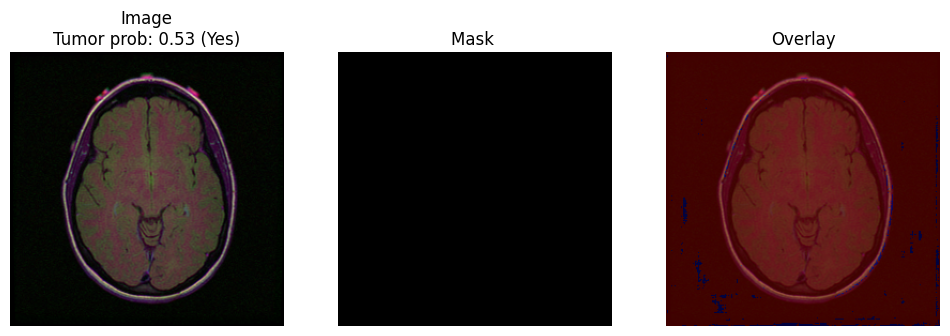

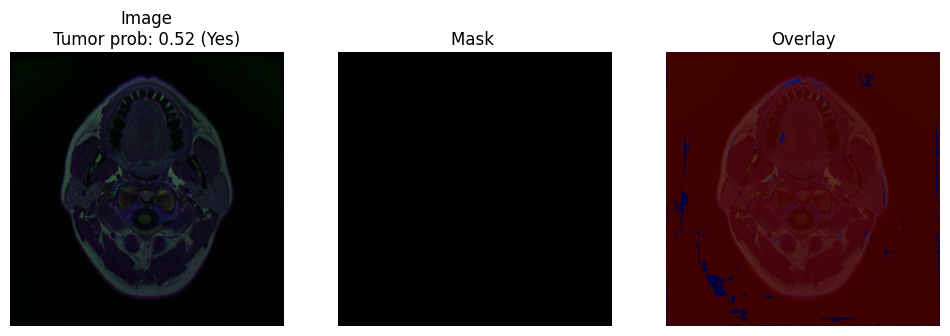

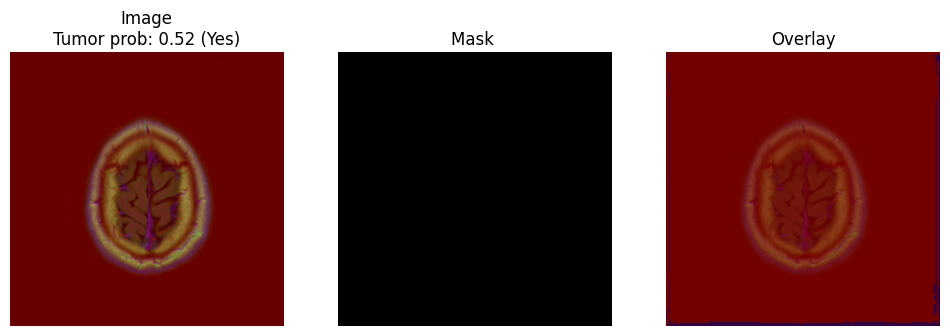

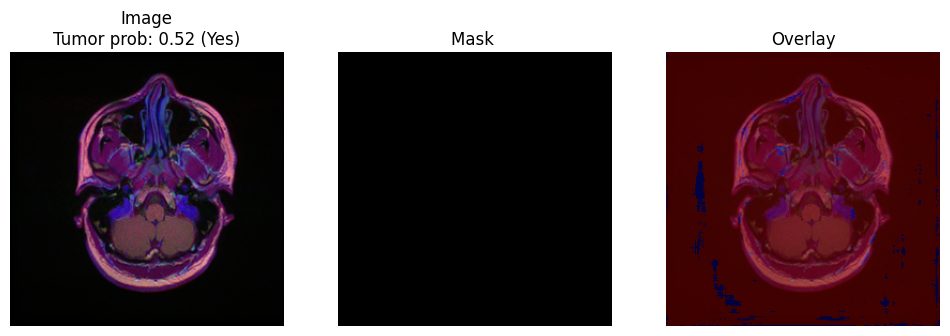

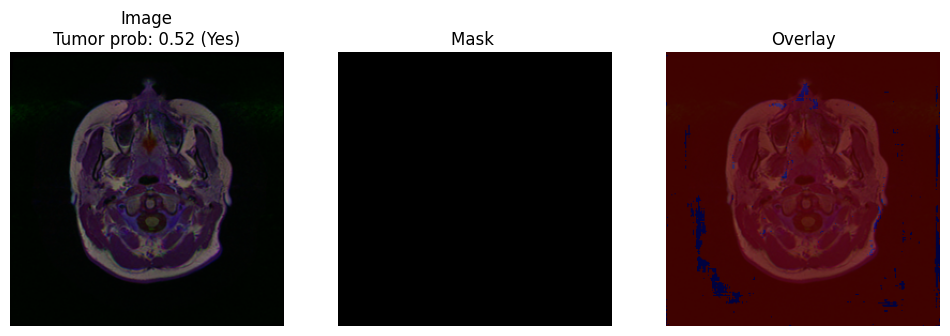

In [21]:
visualize_random_samples(df_final, model1, unet_model, n=5, clf_threshold=0.5, seg_threshold=0.5, img_size=256)